In [79]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Problem Statement 1

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [80]:
#read the data
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [81]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [82]:
#Data visualizationsns.pairplot(df)

In [83]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [84]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

<Axes: >

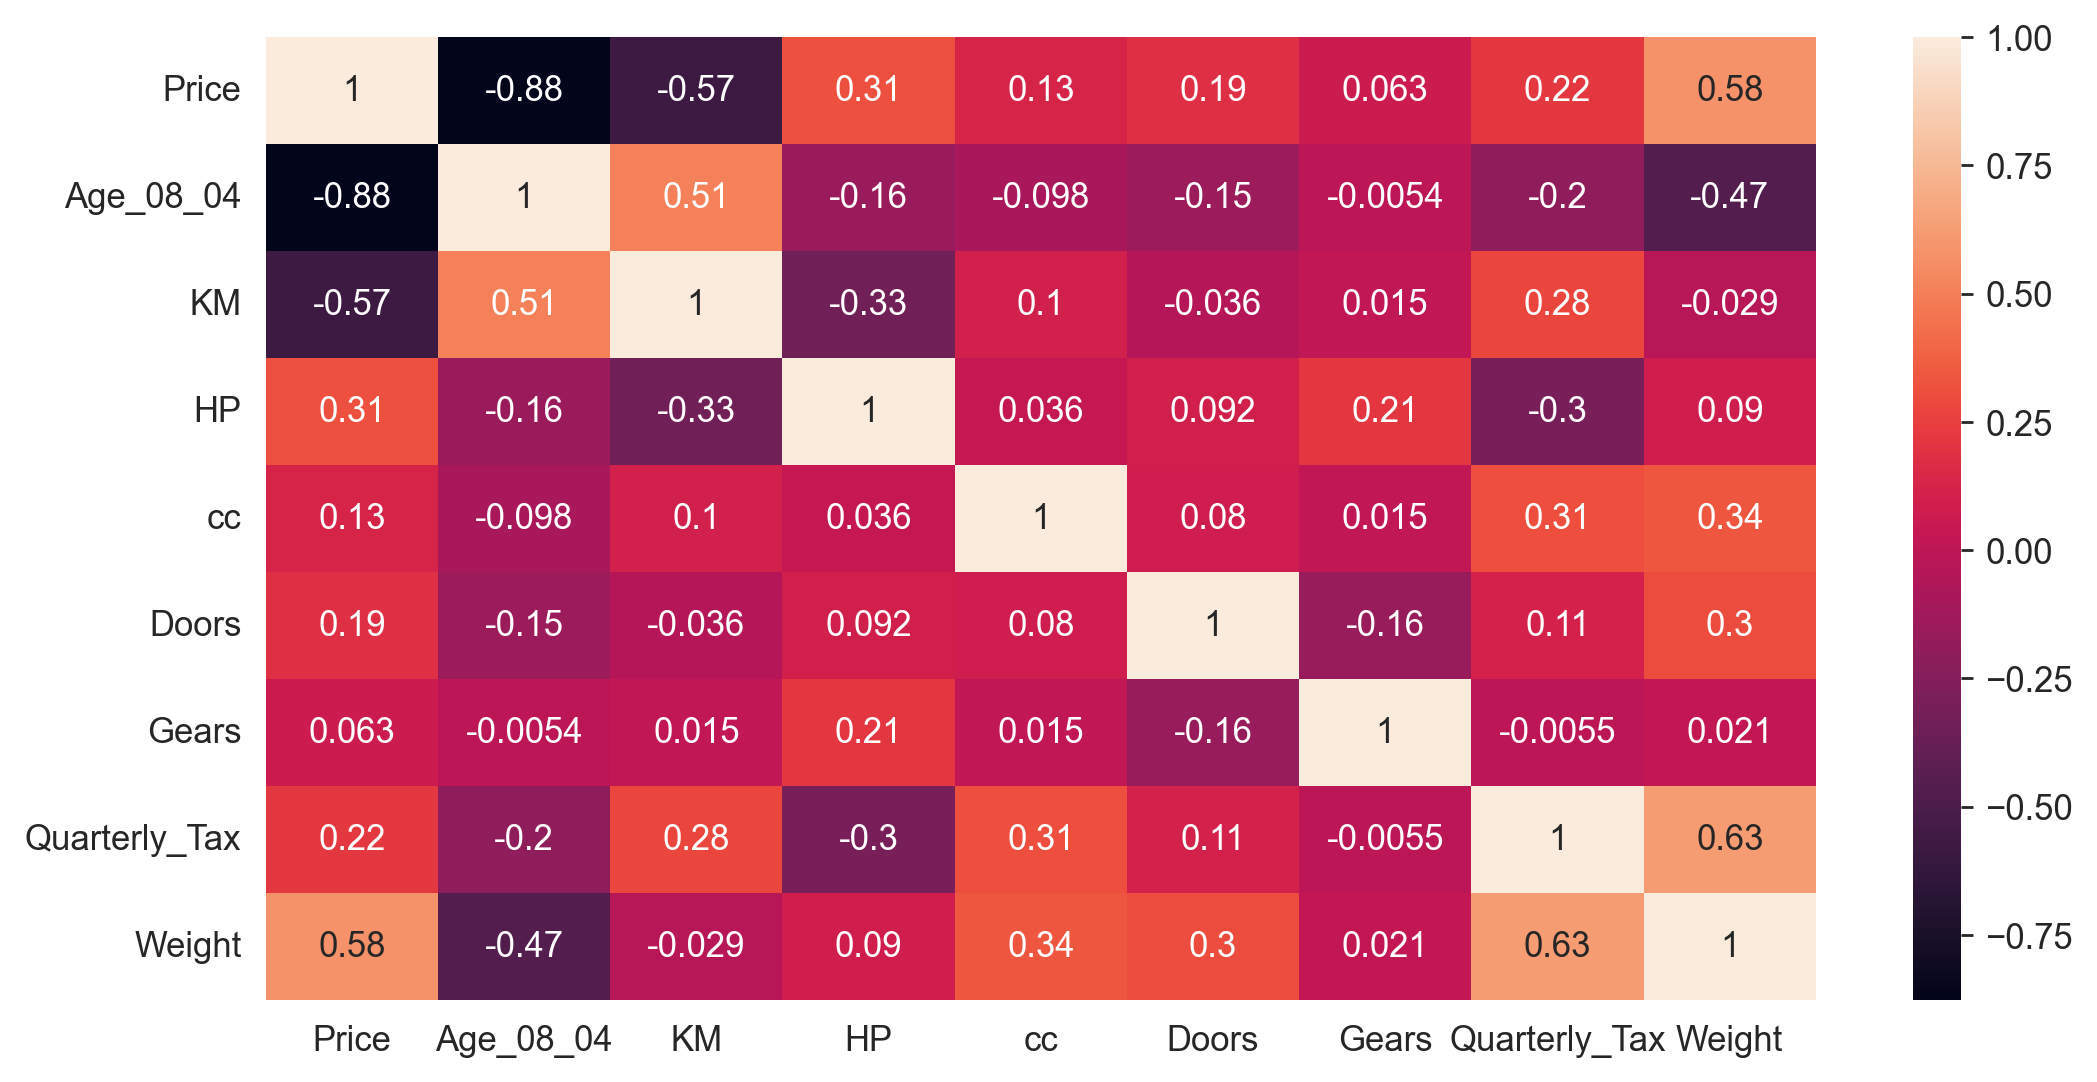

In [85]:
#Correlation
sns.heatmap(df.corr(),annot=True)

### Model Building

In [86]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [87]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

### Simple Linear Regression

In [88]:
#Price
price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df).fit()
price.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

### Calculate VIF

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [91]:
data = df.drop(columns=['Price'])
data

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986   90  2000      3      5            210    1165
1            23  72937   90  2000      3      5            210    1165
2            24  41711   90  2000      3      5            210    1165
3            26  48000   90  2000      3      5            210    1165
4            30  38500   90  2000      3      5            210    1170
...         ...    ...  ...   ...    ...    ...            ...     ...
1431         69  20544   86  1300      3      5             69    1025
1432         72  19000   86  1300      3      5             69    1015
1433         71  17016   86  1300      3      5             69    1015
1434         70  16916   86  1300      3      5             69    1015
1435         76      1  110  1600      5      5             19    1114

[1436 rows x 8 columns]

In [92]:
vif = pd.DataFrame()
vif['Features'] = data.columns
vif

Features
0      Age_08_04
1             KM
2             HP
3             cc
4          Doors
5          Gears
6  Quarterly_Tax
7         Weight

In [93]:
len(data.columns)

8

In [94]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [95]:
vif

Features         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076

### Subset Selection

In [96]:
#Weight
#weight = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data = df).fit()
#weight.rsquared, weight.aic

In [97]:
#Gears
#gears = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = df).fit()
#gears.rsquared, gears.aic

### MODEL VALIDATION TECHNIQUES
1. Residual Analysis:

In [98]:
# NORMALITY TEST

In [99]:
model.rsquared

0.8637627463428192

In [100]:
#Statsmodel
import statsmodels.api as sm

In [101]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

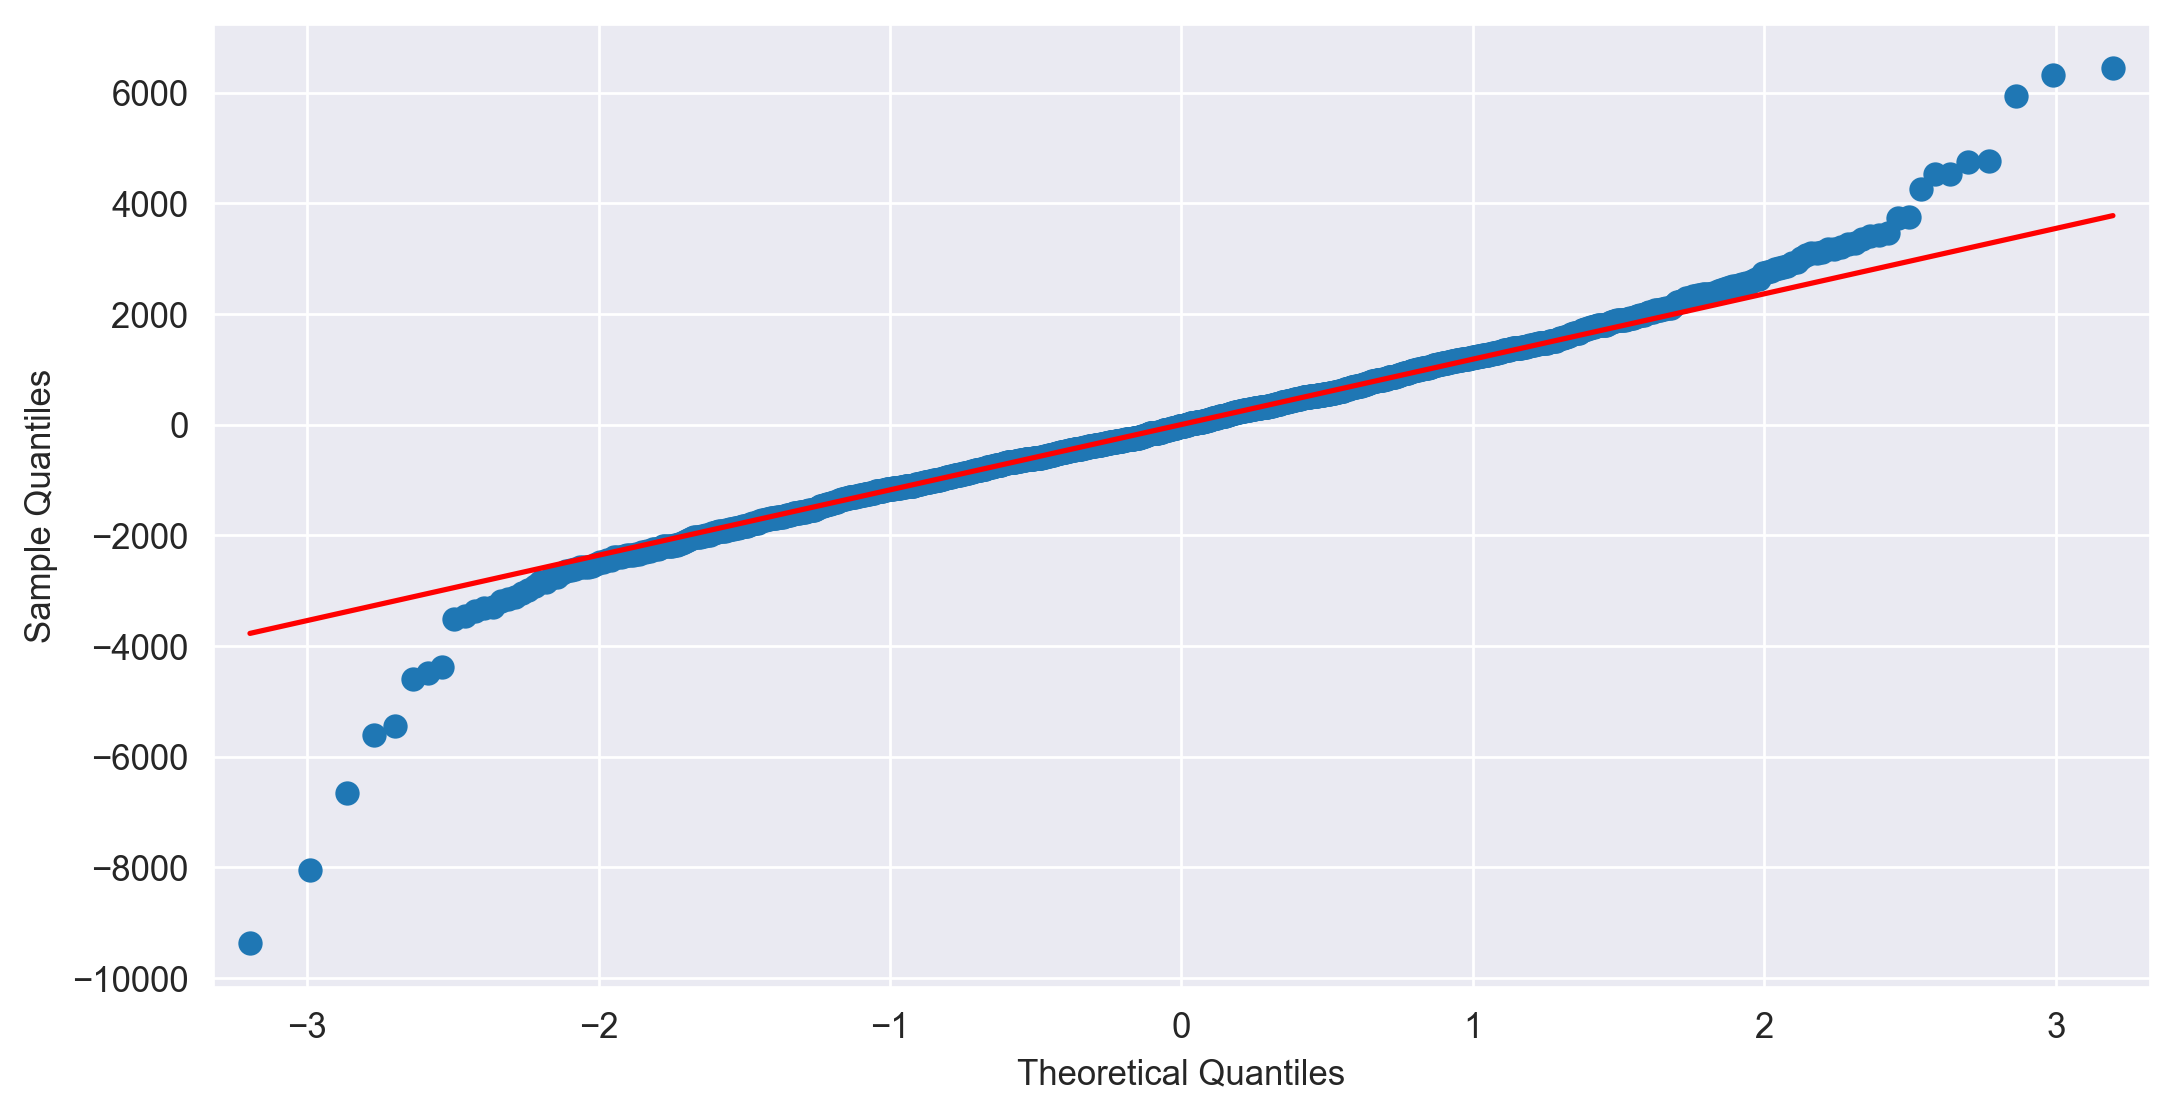

In [102]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [103]:
#get index for higher residuals
np.argmax(model.resid), np.max(model.resid)

(523, 6444.021866865121)

2. Residual plot of Homoscedasticity
    - Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [104]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [105]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [106]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

Text(0, 0.5, 'Errors')

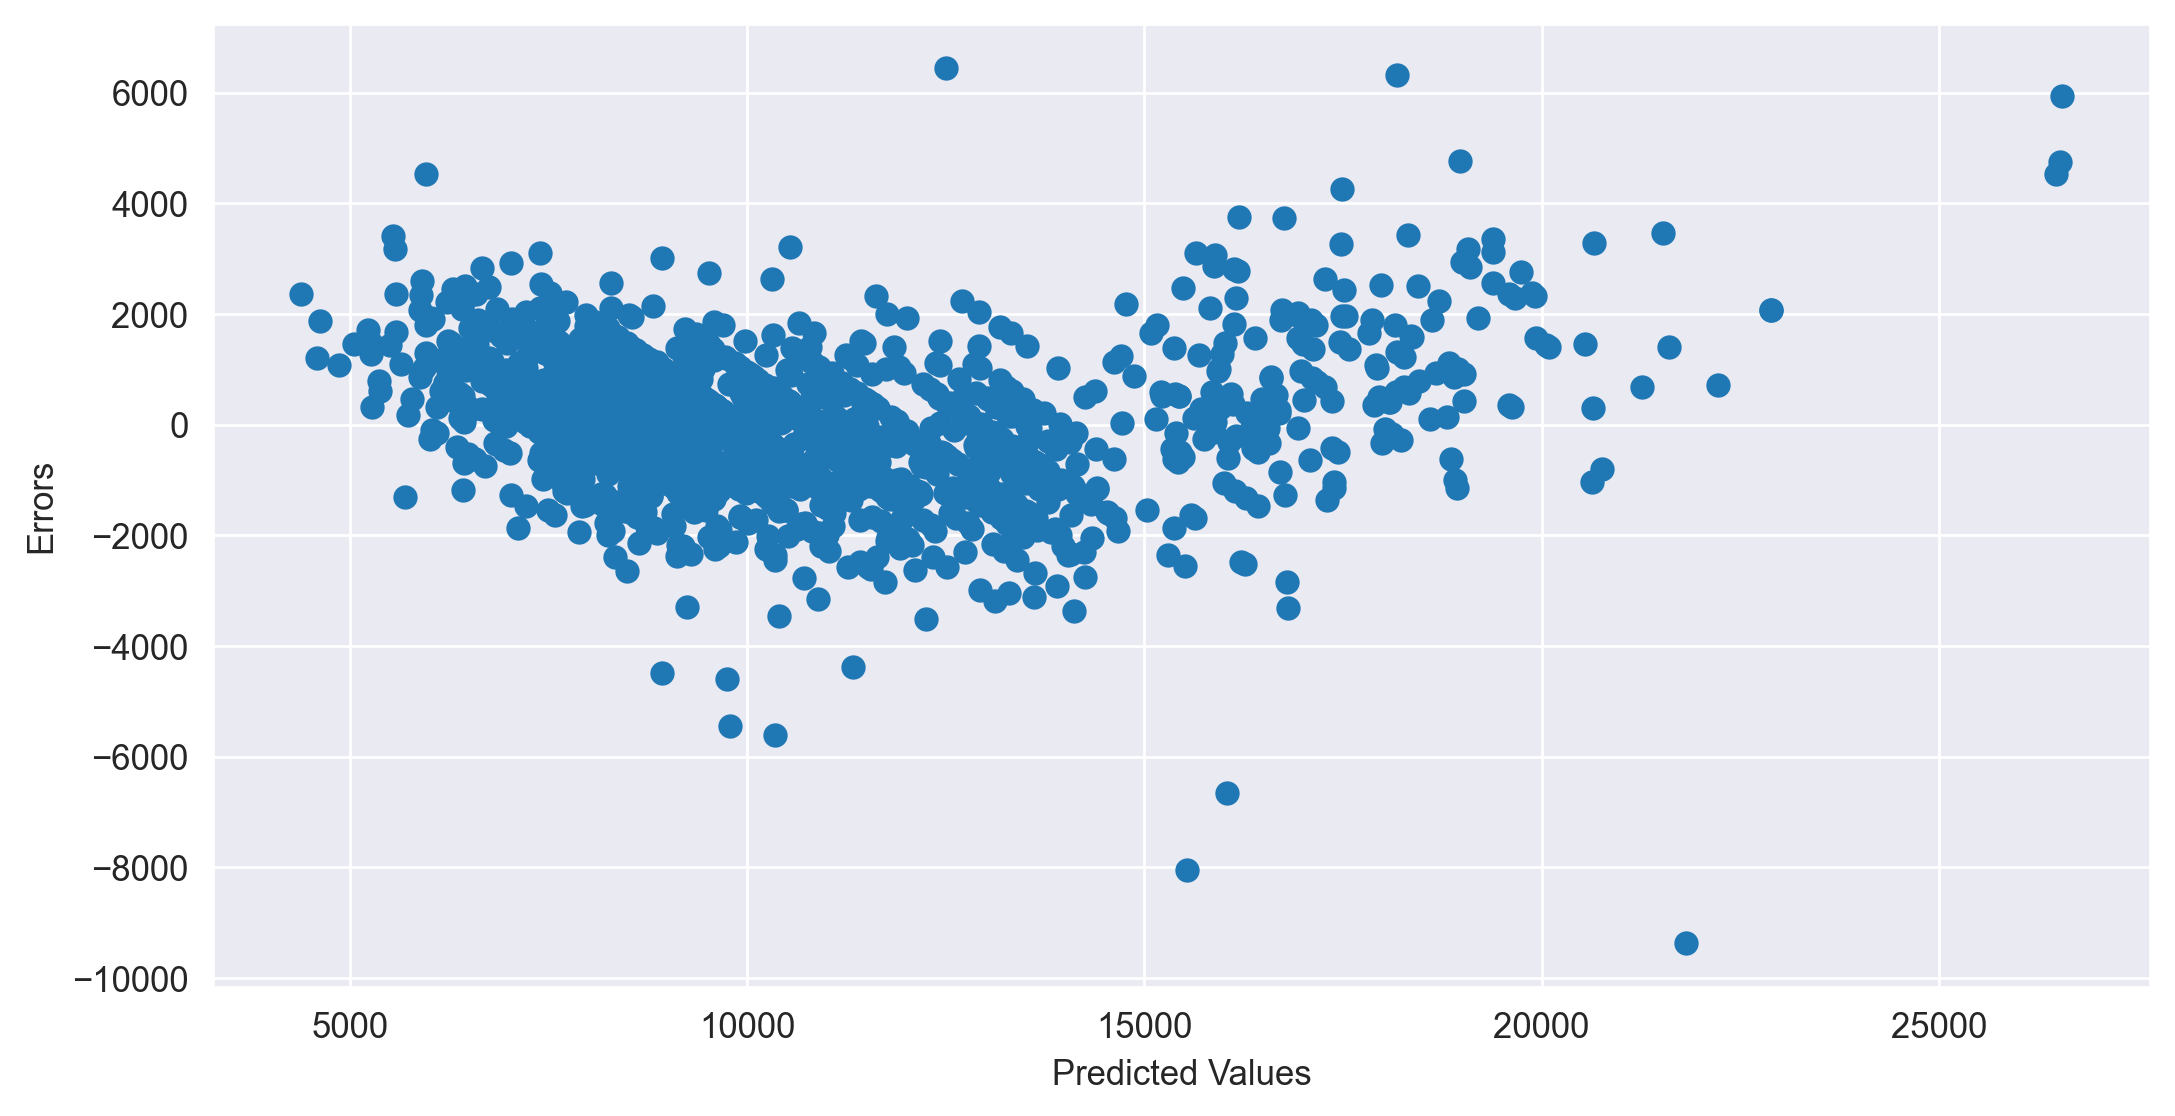

In [107]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

3. Residual VS Regressor

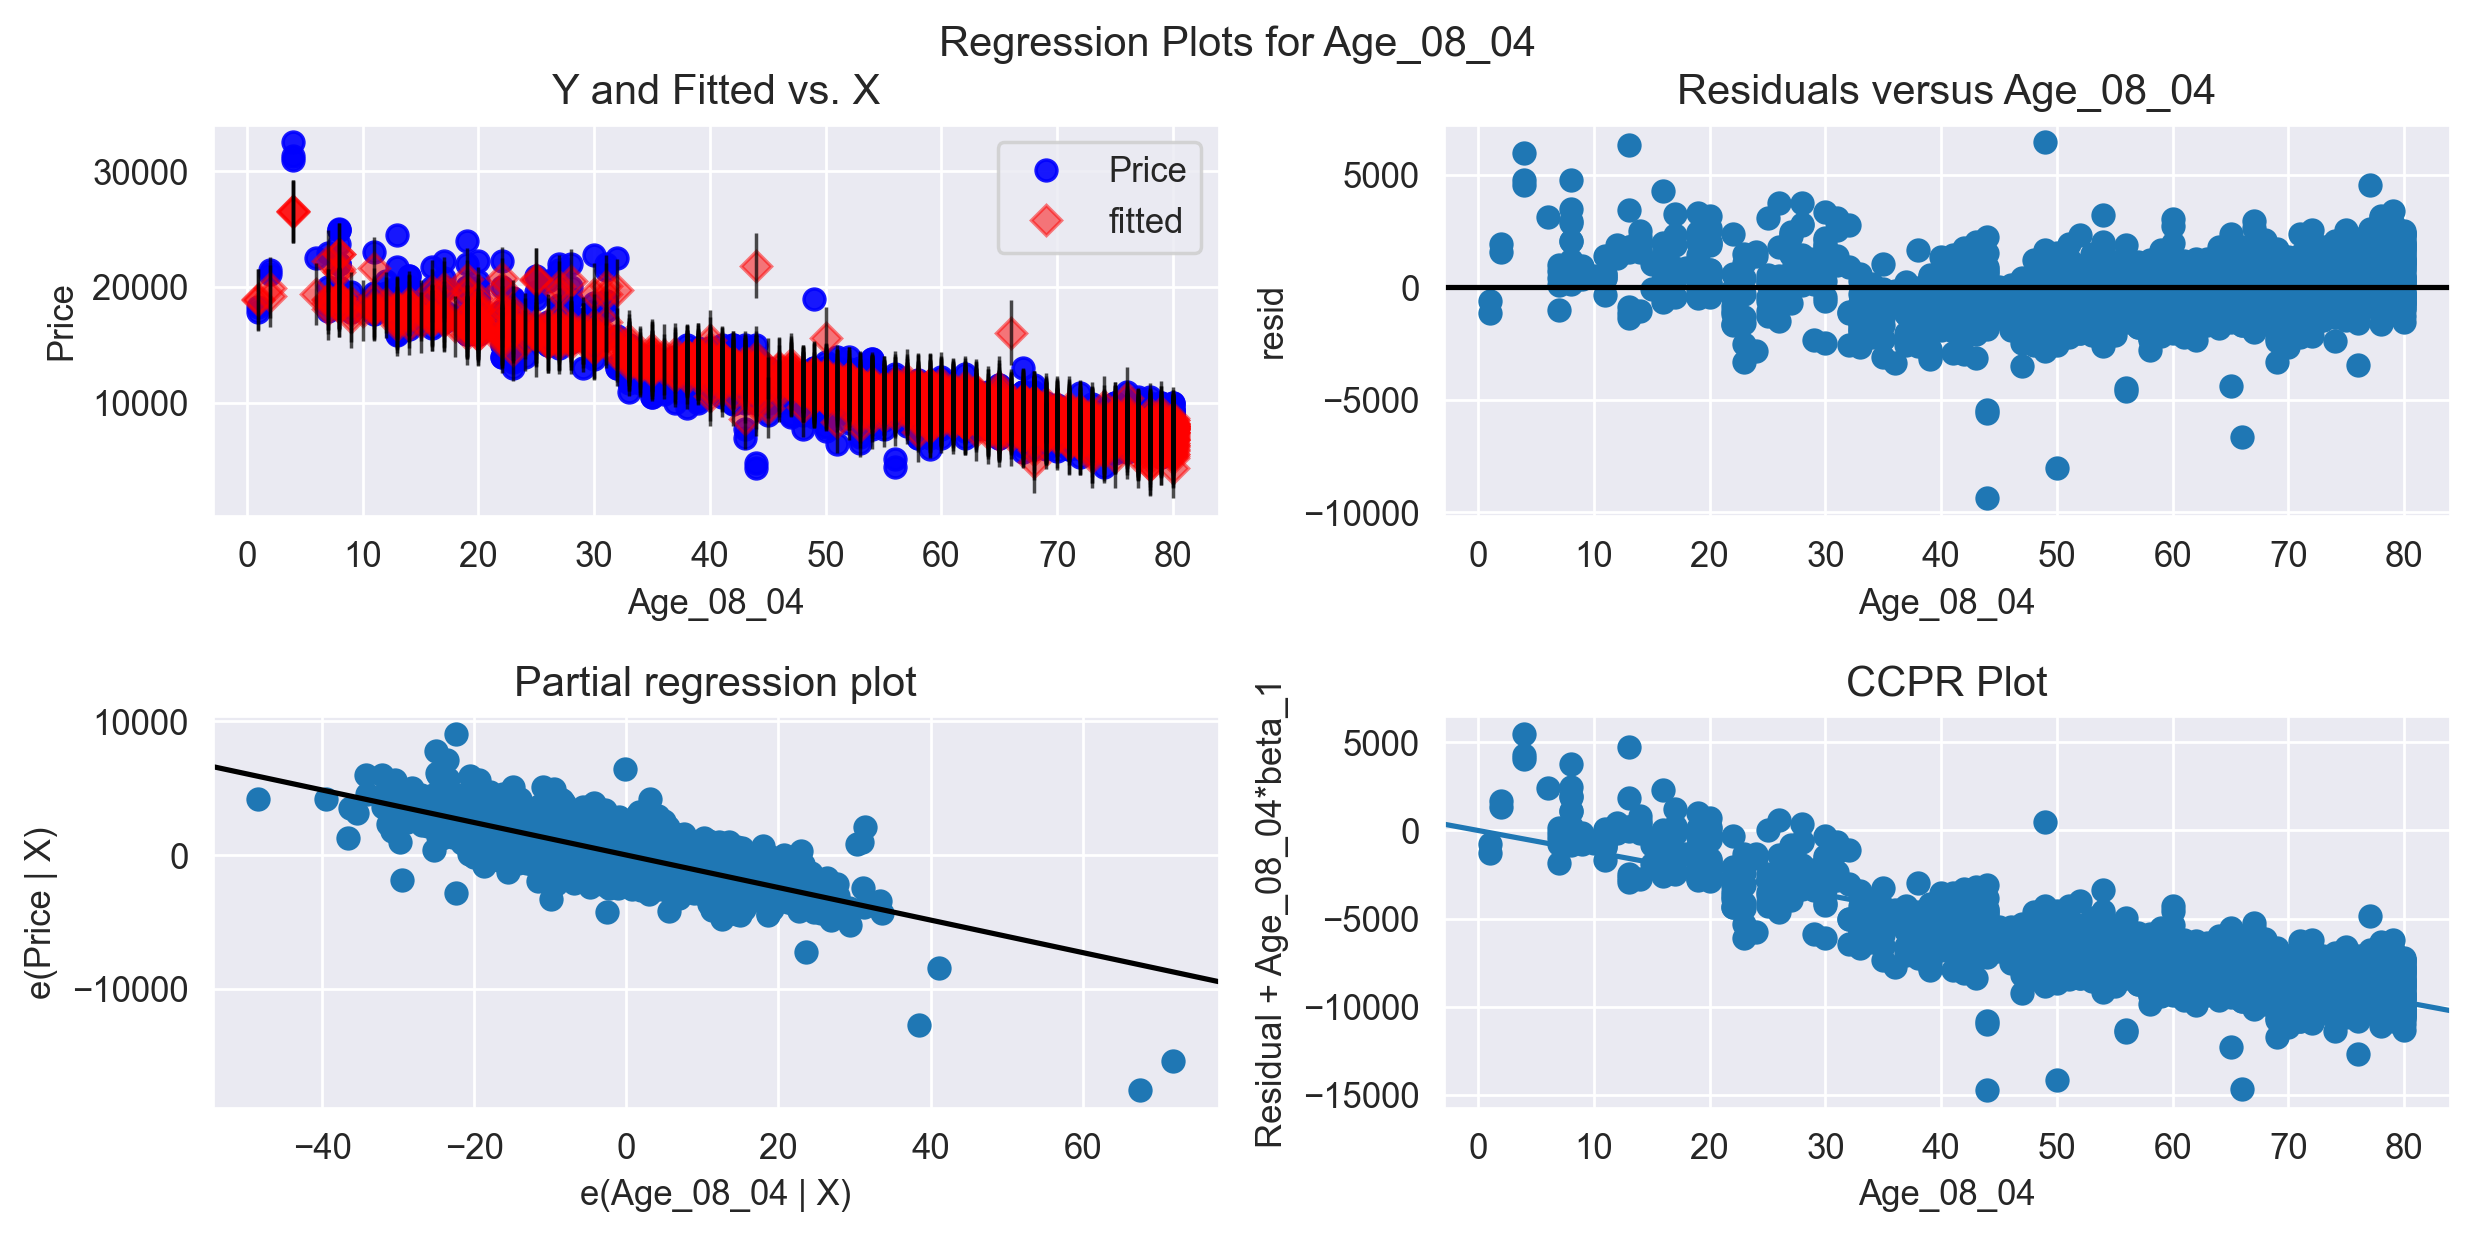

In [108]:
#Age_08_04
sm.graphics.plot_regress_exog(model,'Age_08_04');
#Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight

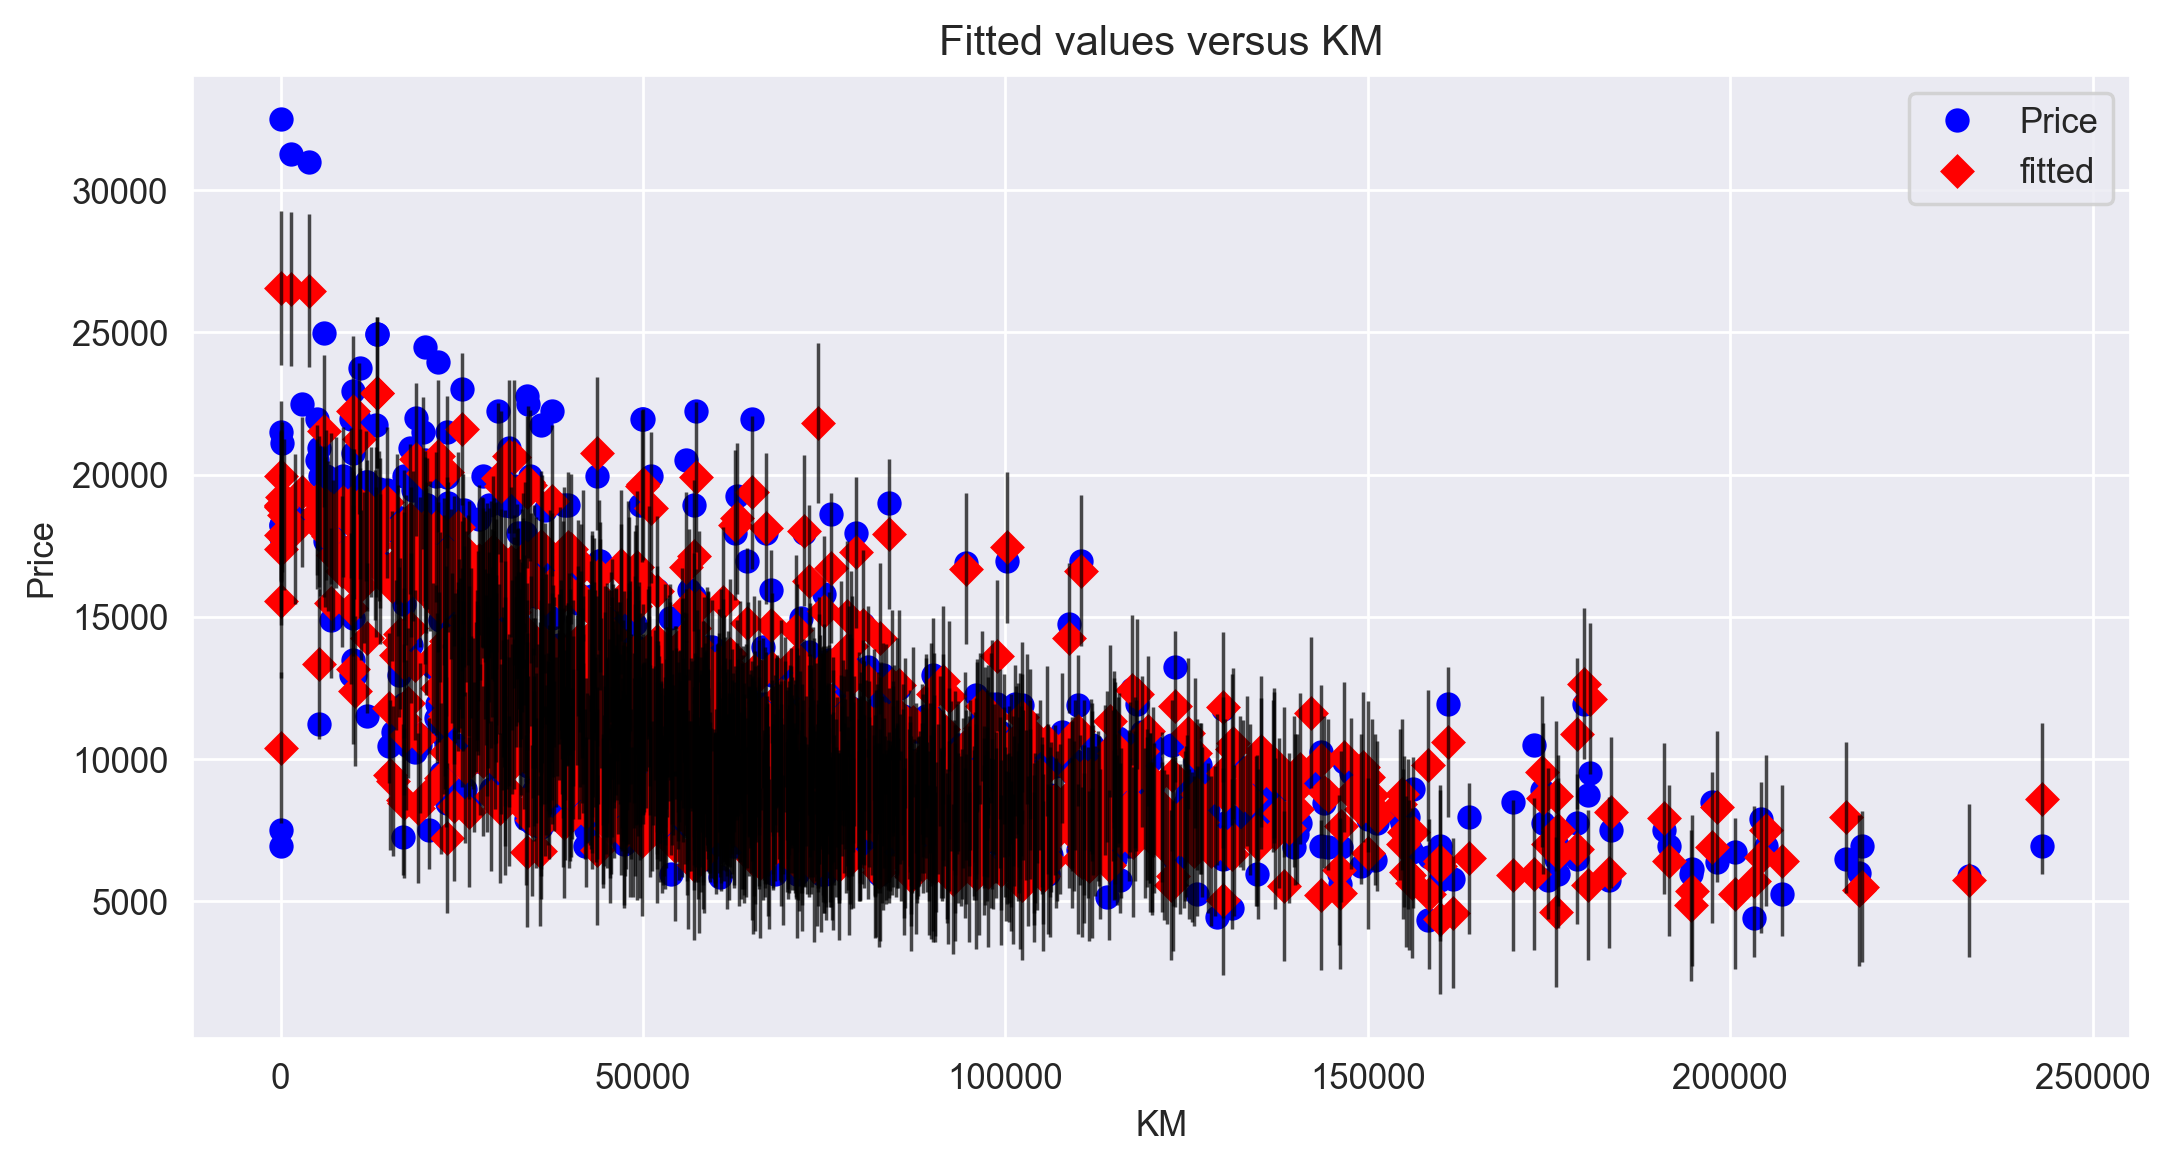

In [109]:
#KM
sm.graphics.plot_fit(model,'KM');

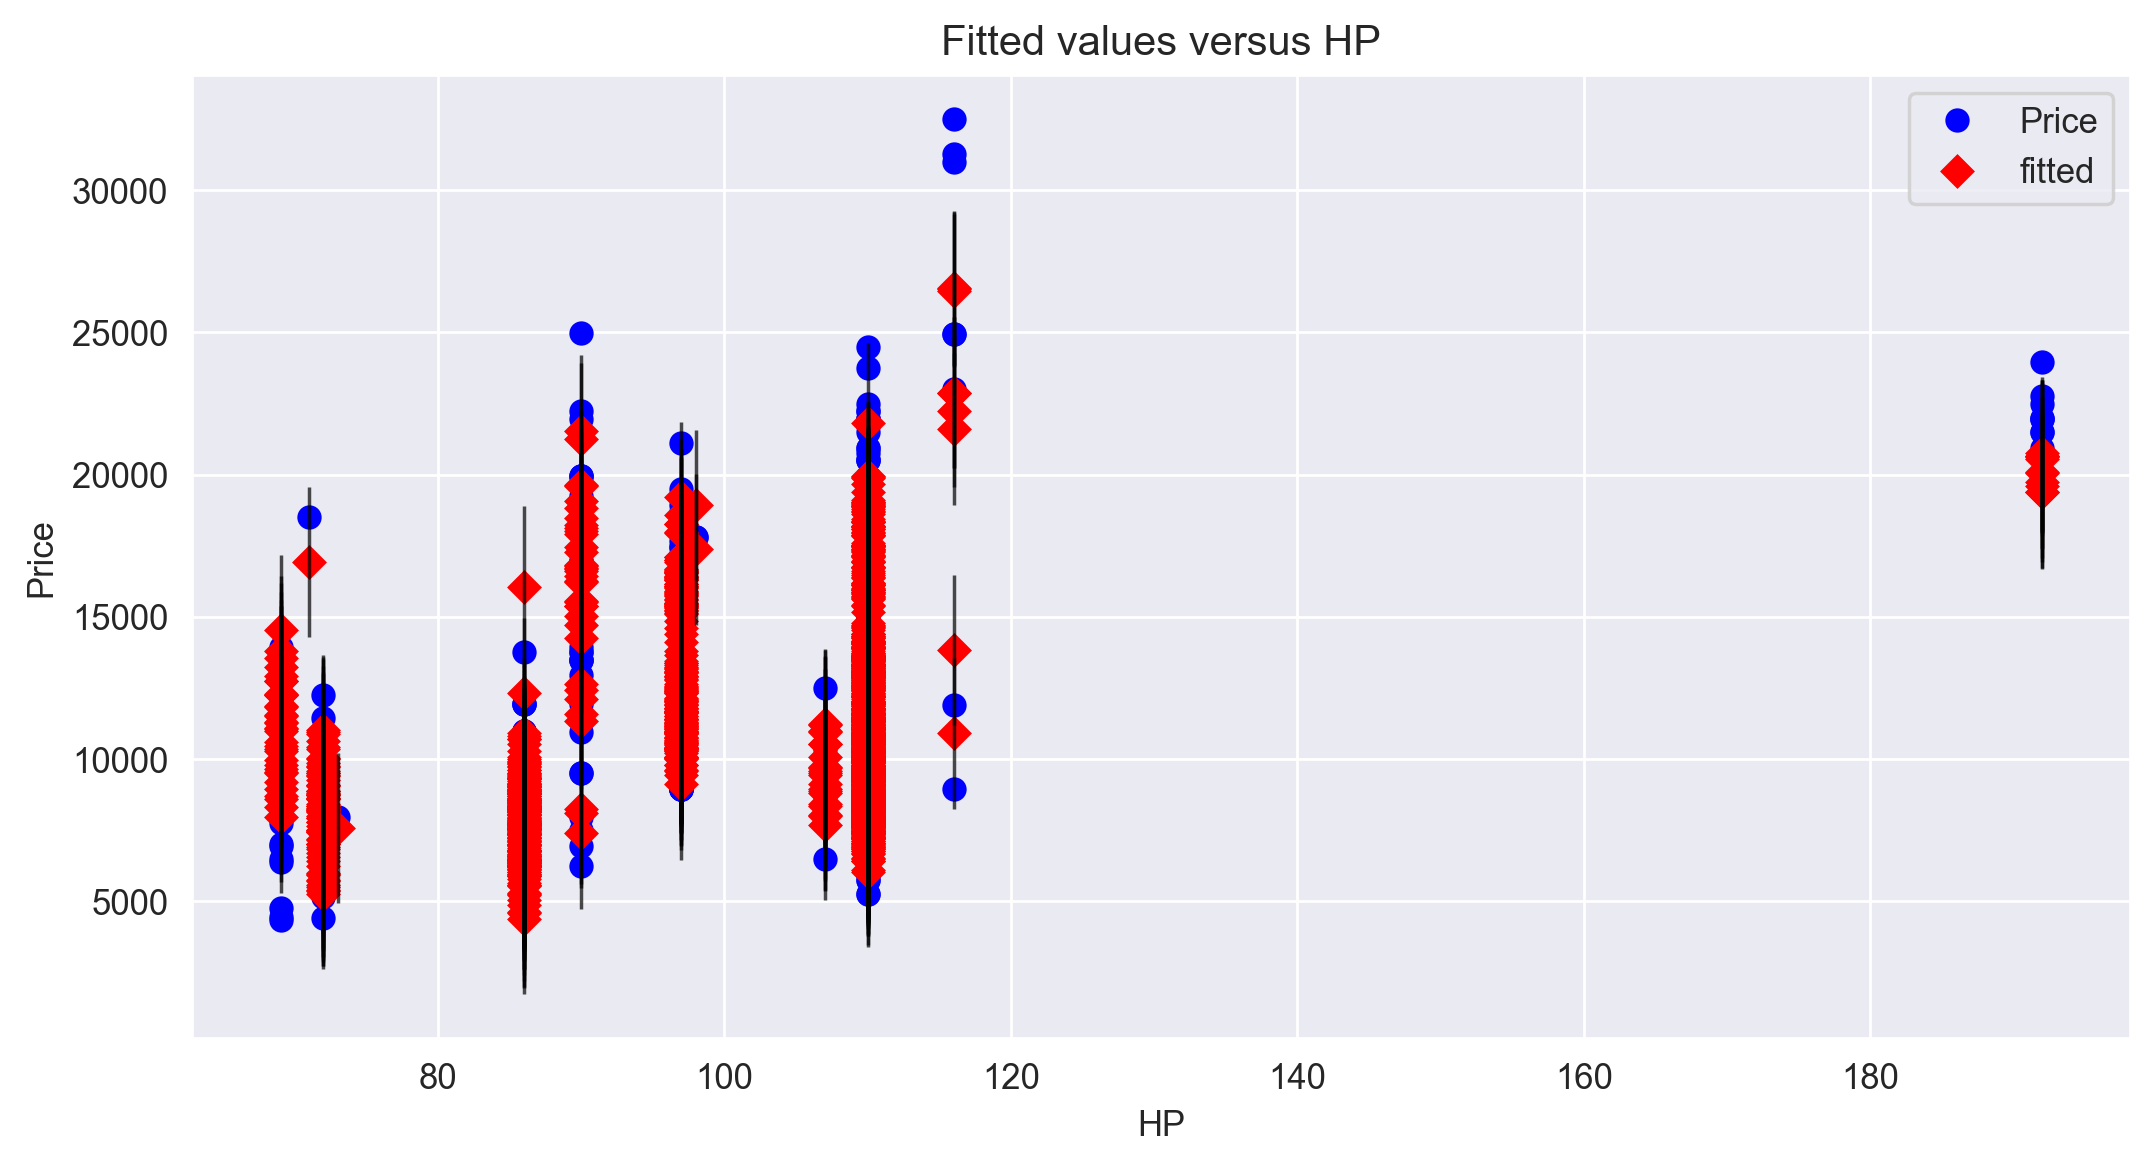

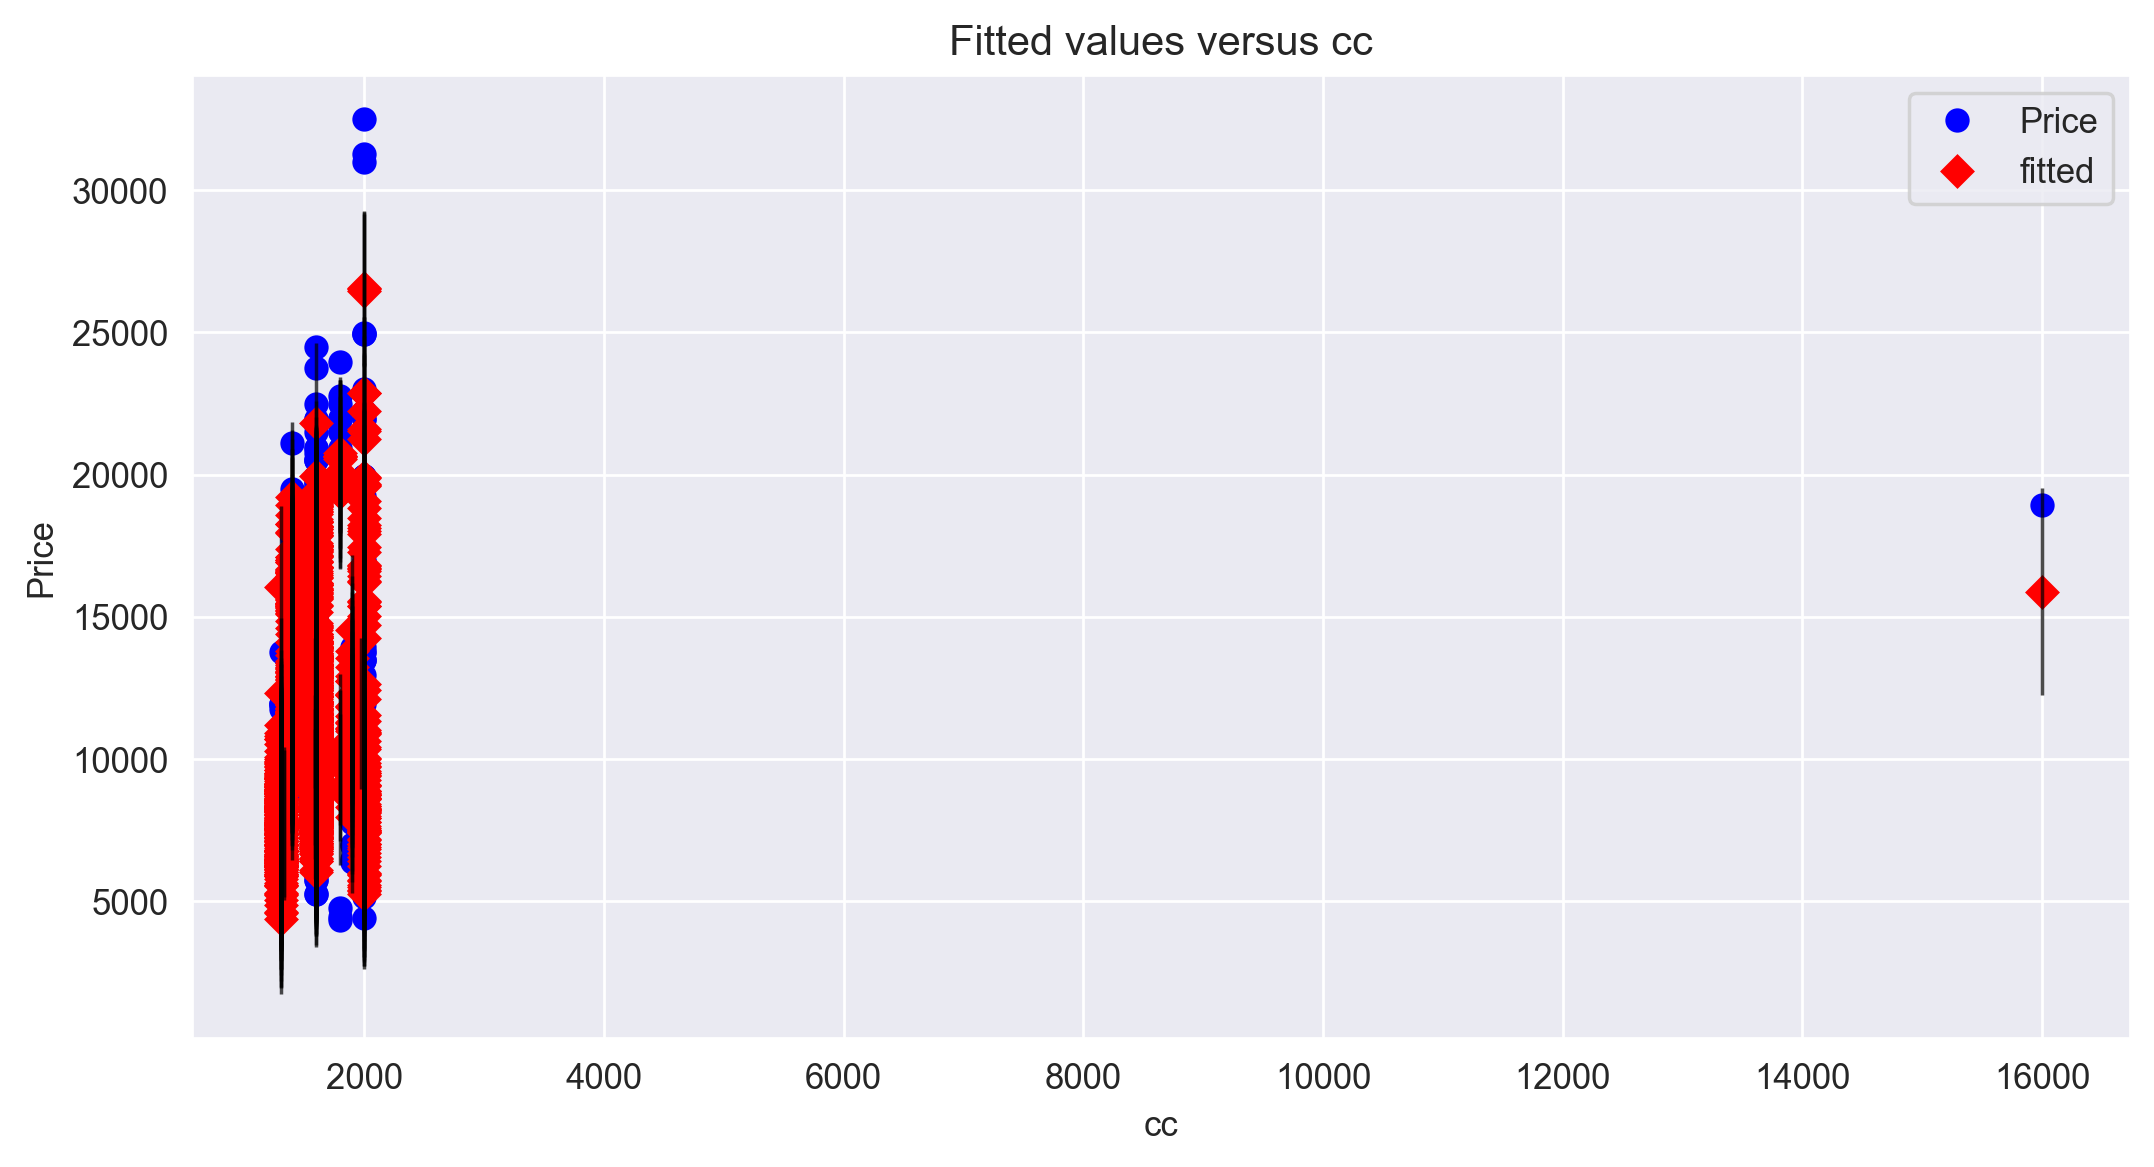

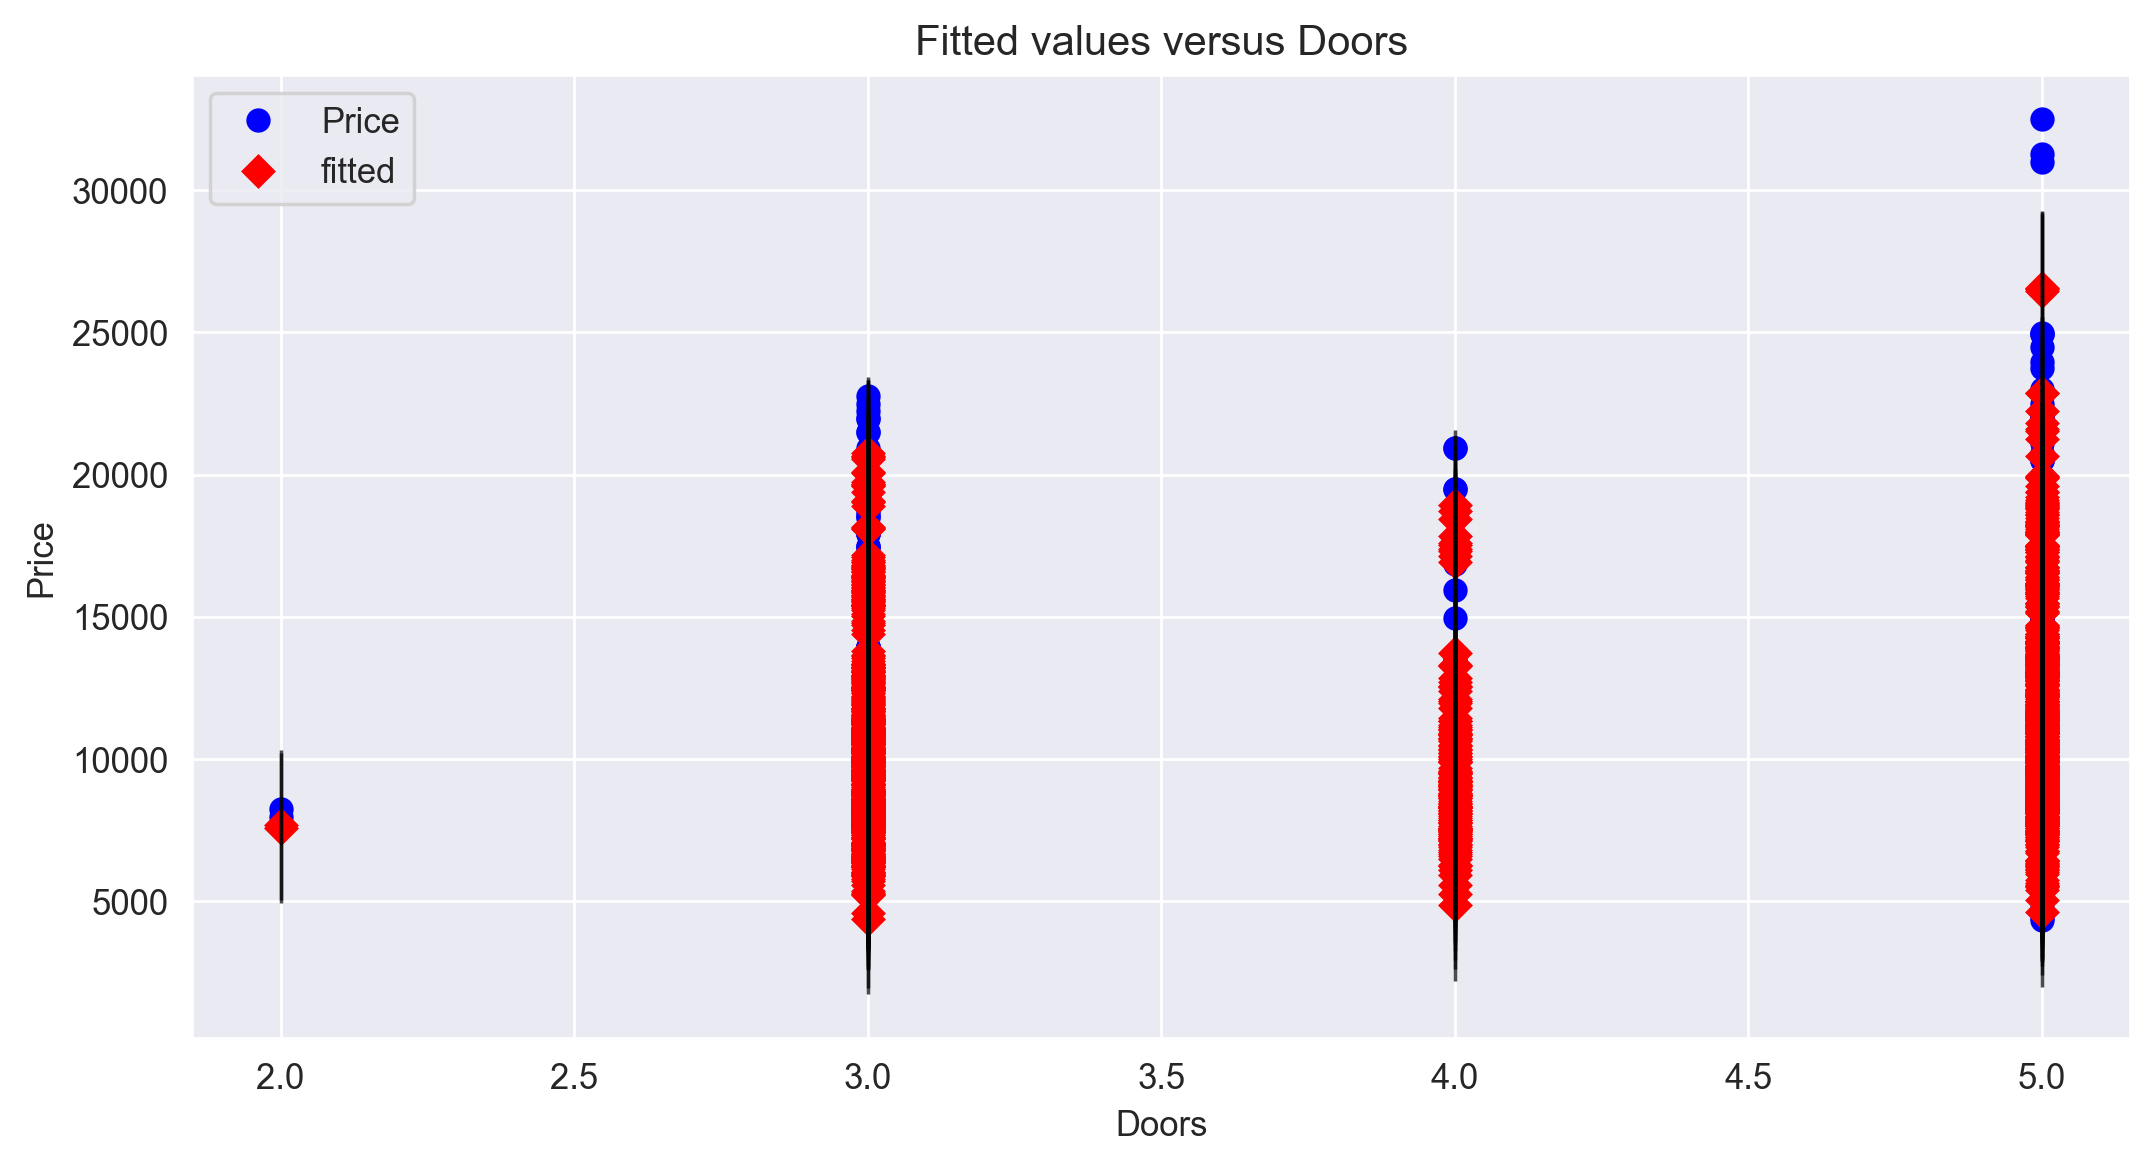

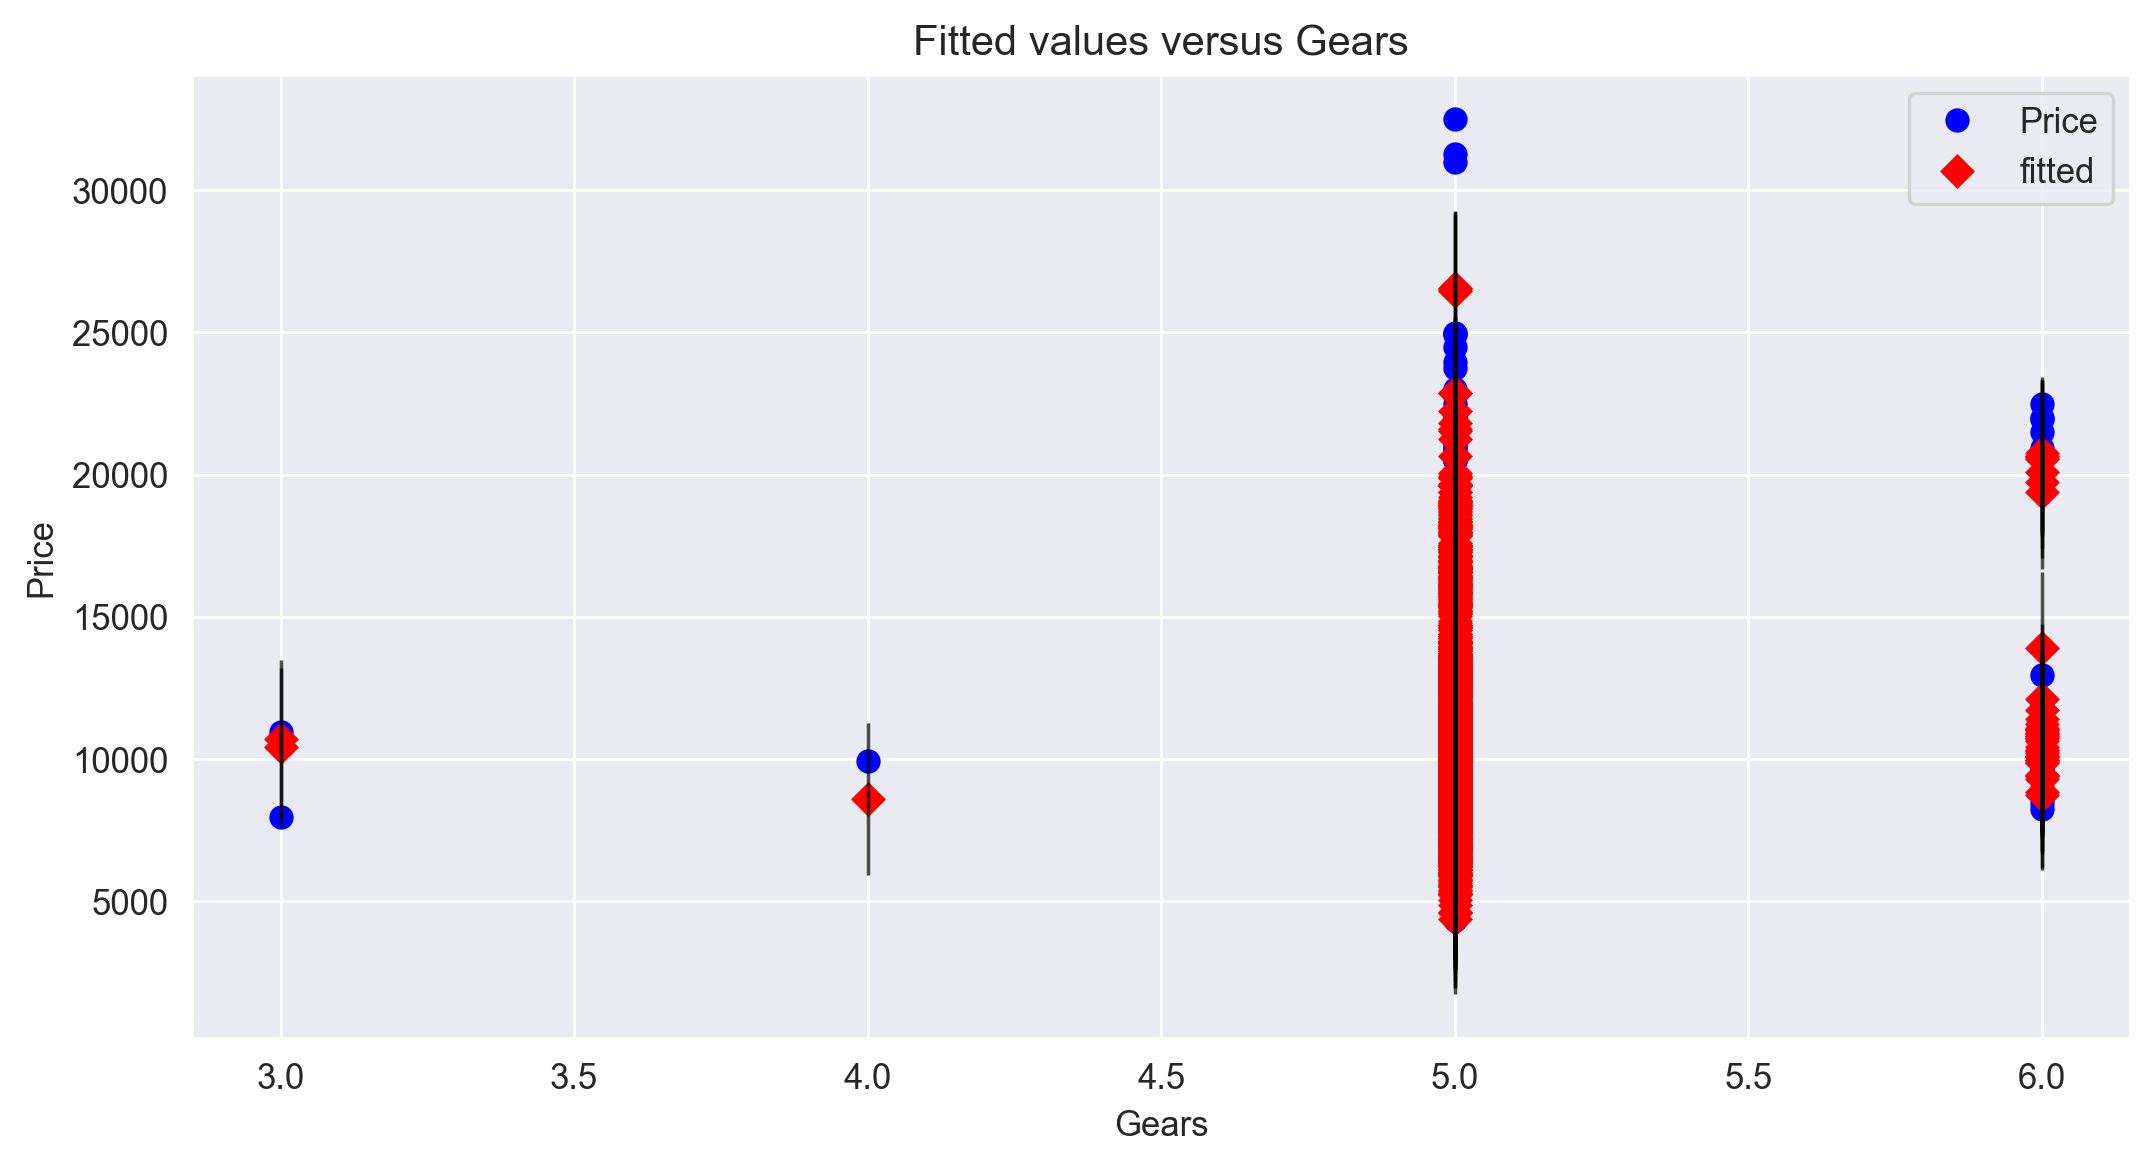

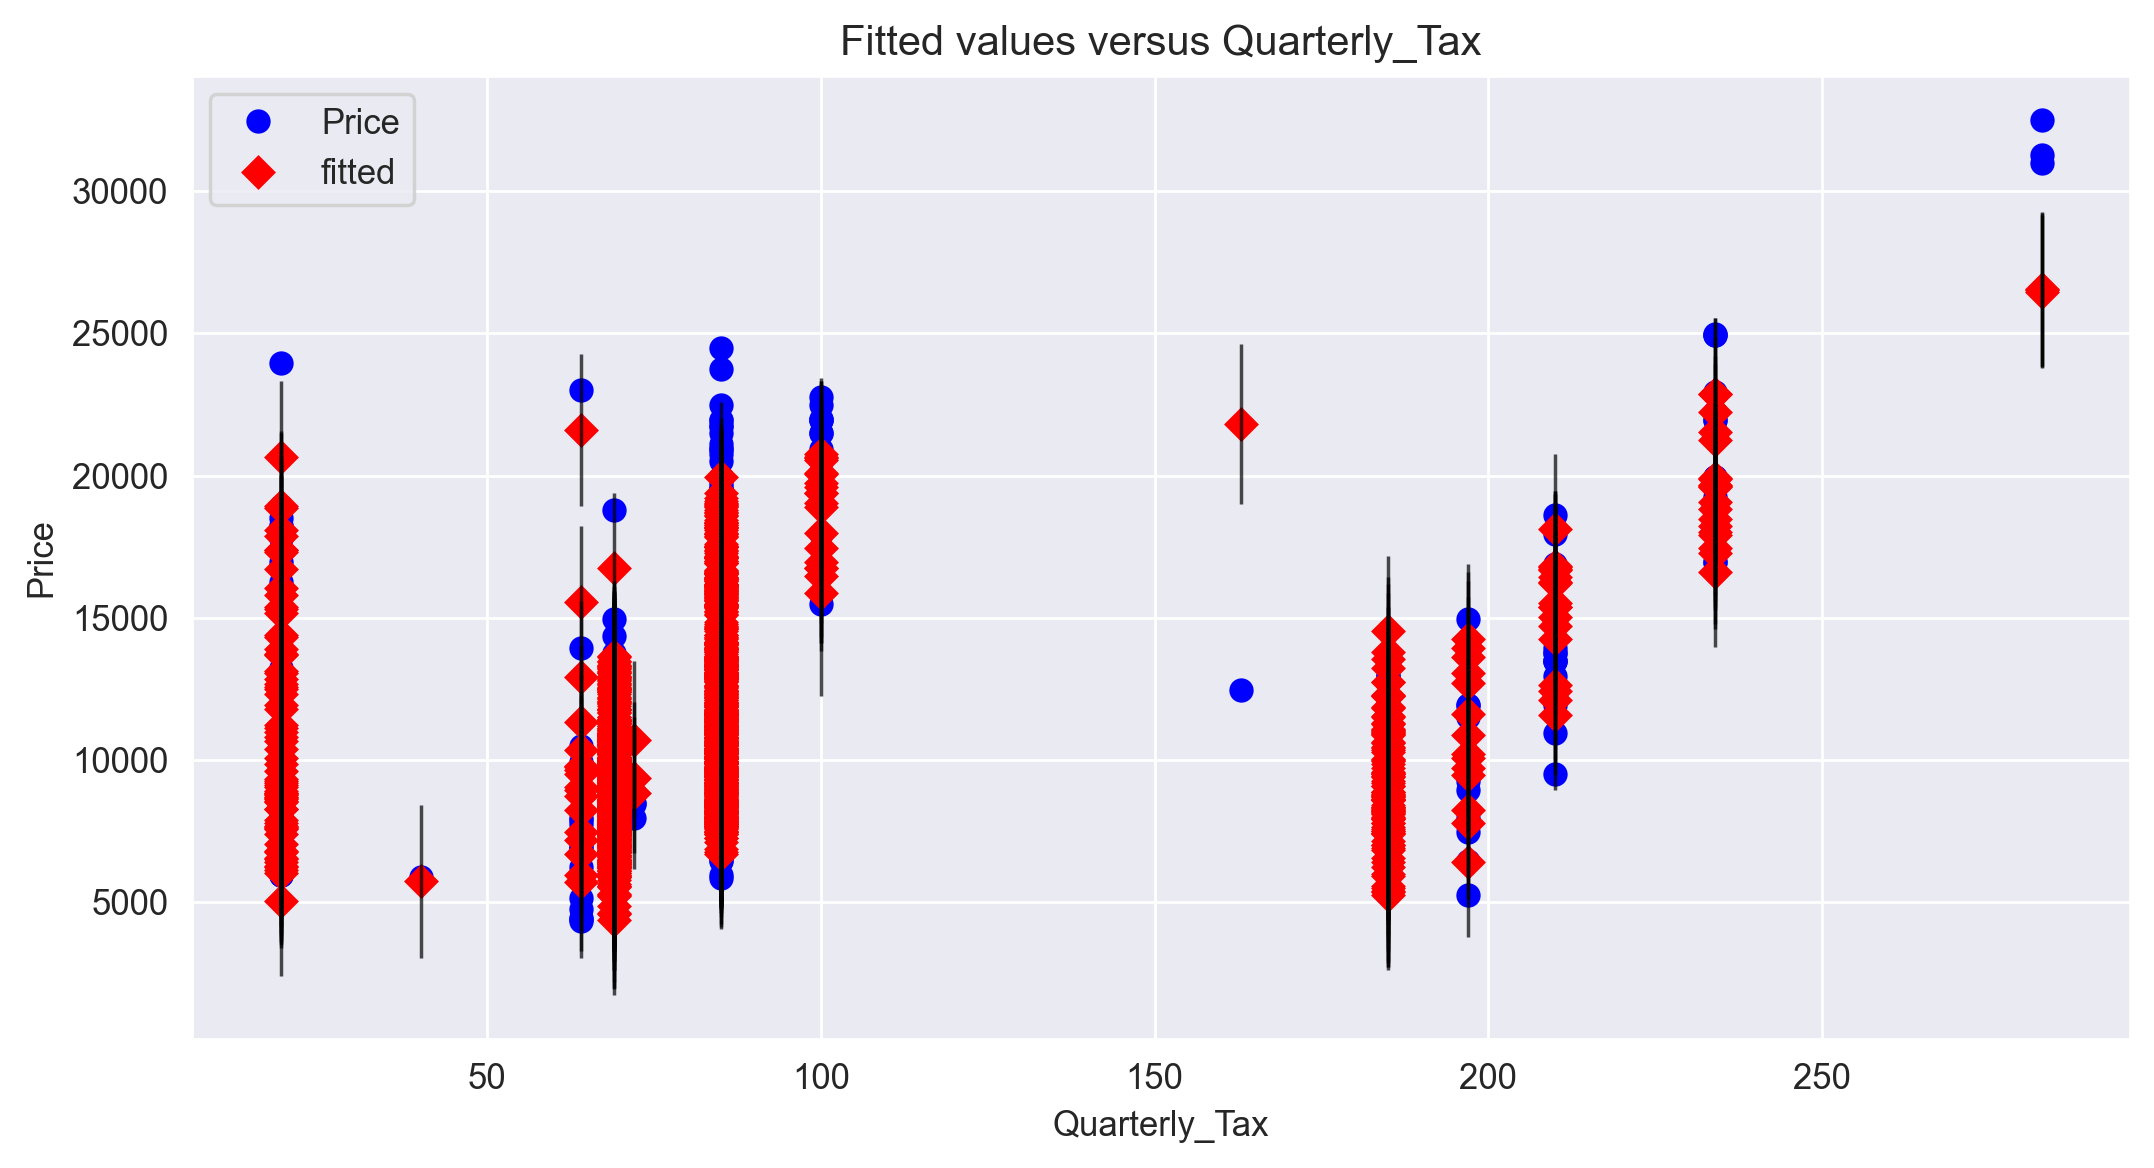

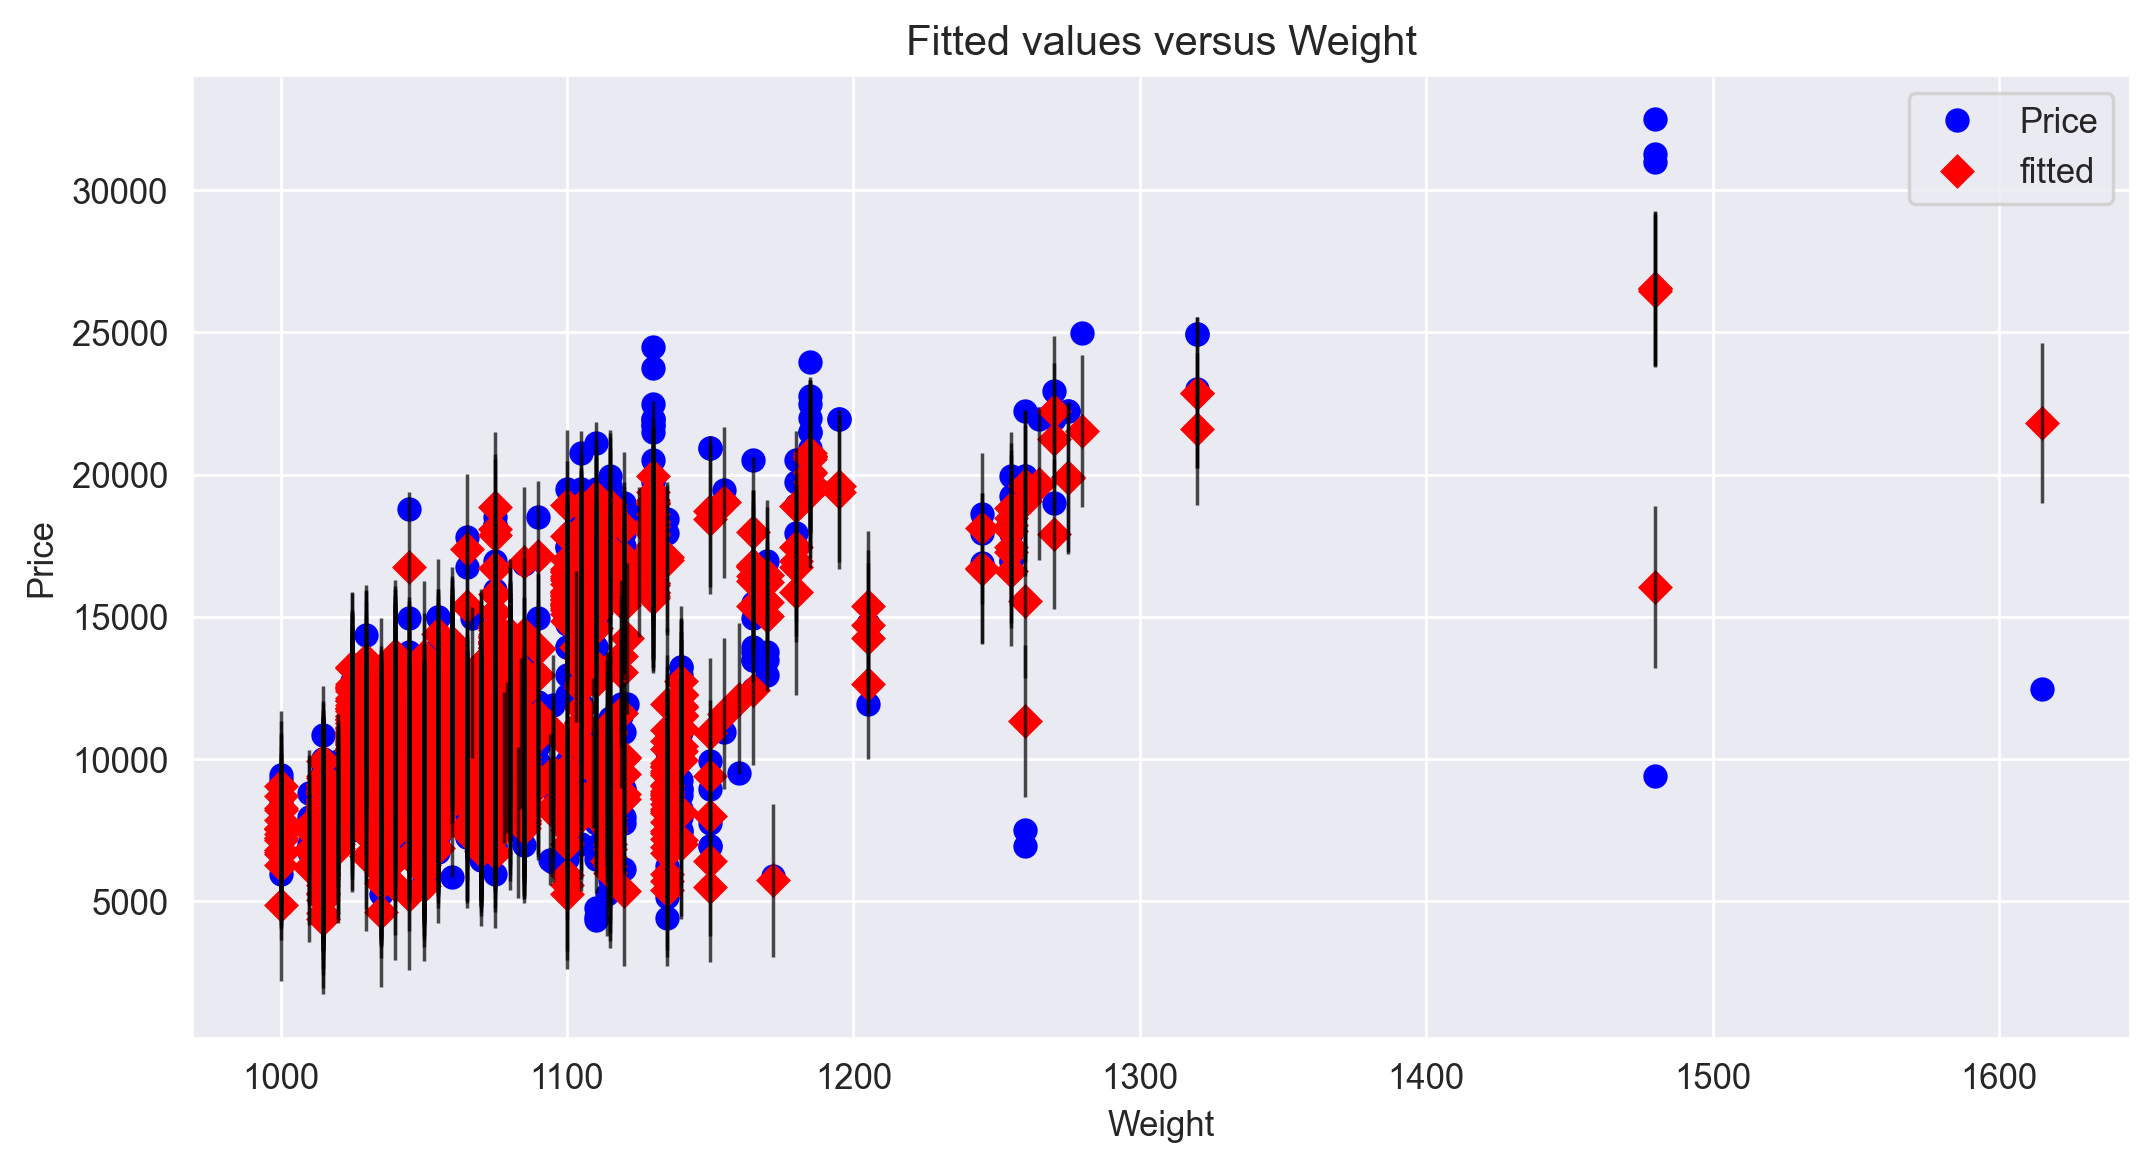

In [110]:
sm.graphics.plot_fit(model,'HP');
sm.graphics.plot_fit(model,'cc');
sm.graphics.plot_fit(model,'Doors');
sm.graphics.plot_fit(model,'Gears');
sm.graphics.plot_fit(model,'Quarterly_Tax');
sm.graphics.plot_fit(model,'Weight');

### MODEL DELETION TECHNIQUES
1. Cook's Distance

In [111]:
#Detecting influencers and outliers
model

In [112]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [113]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

Text(0, 0.5, 'Cooks Distance')

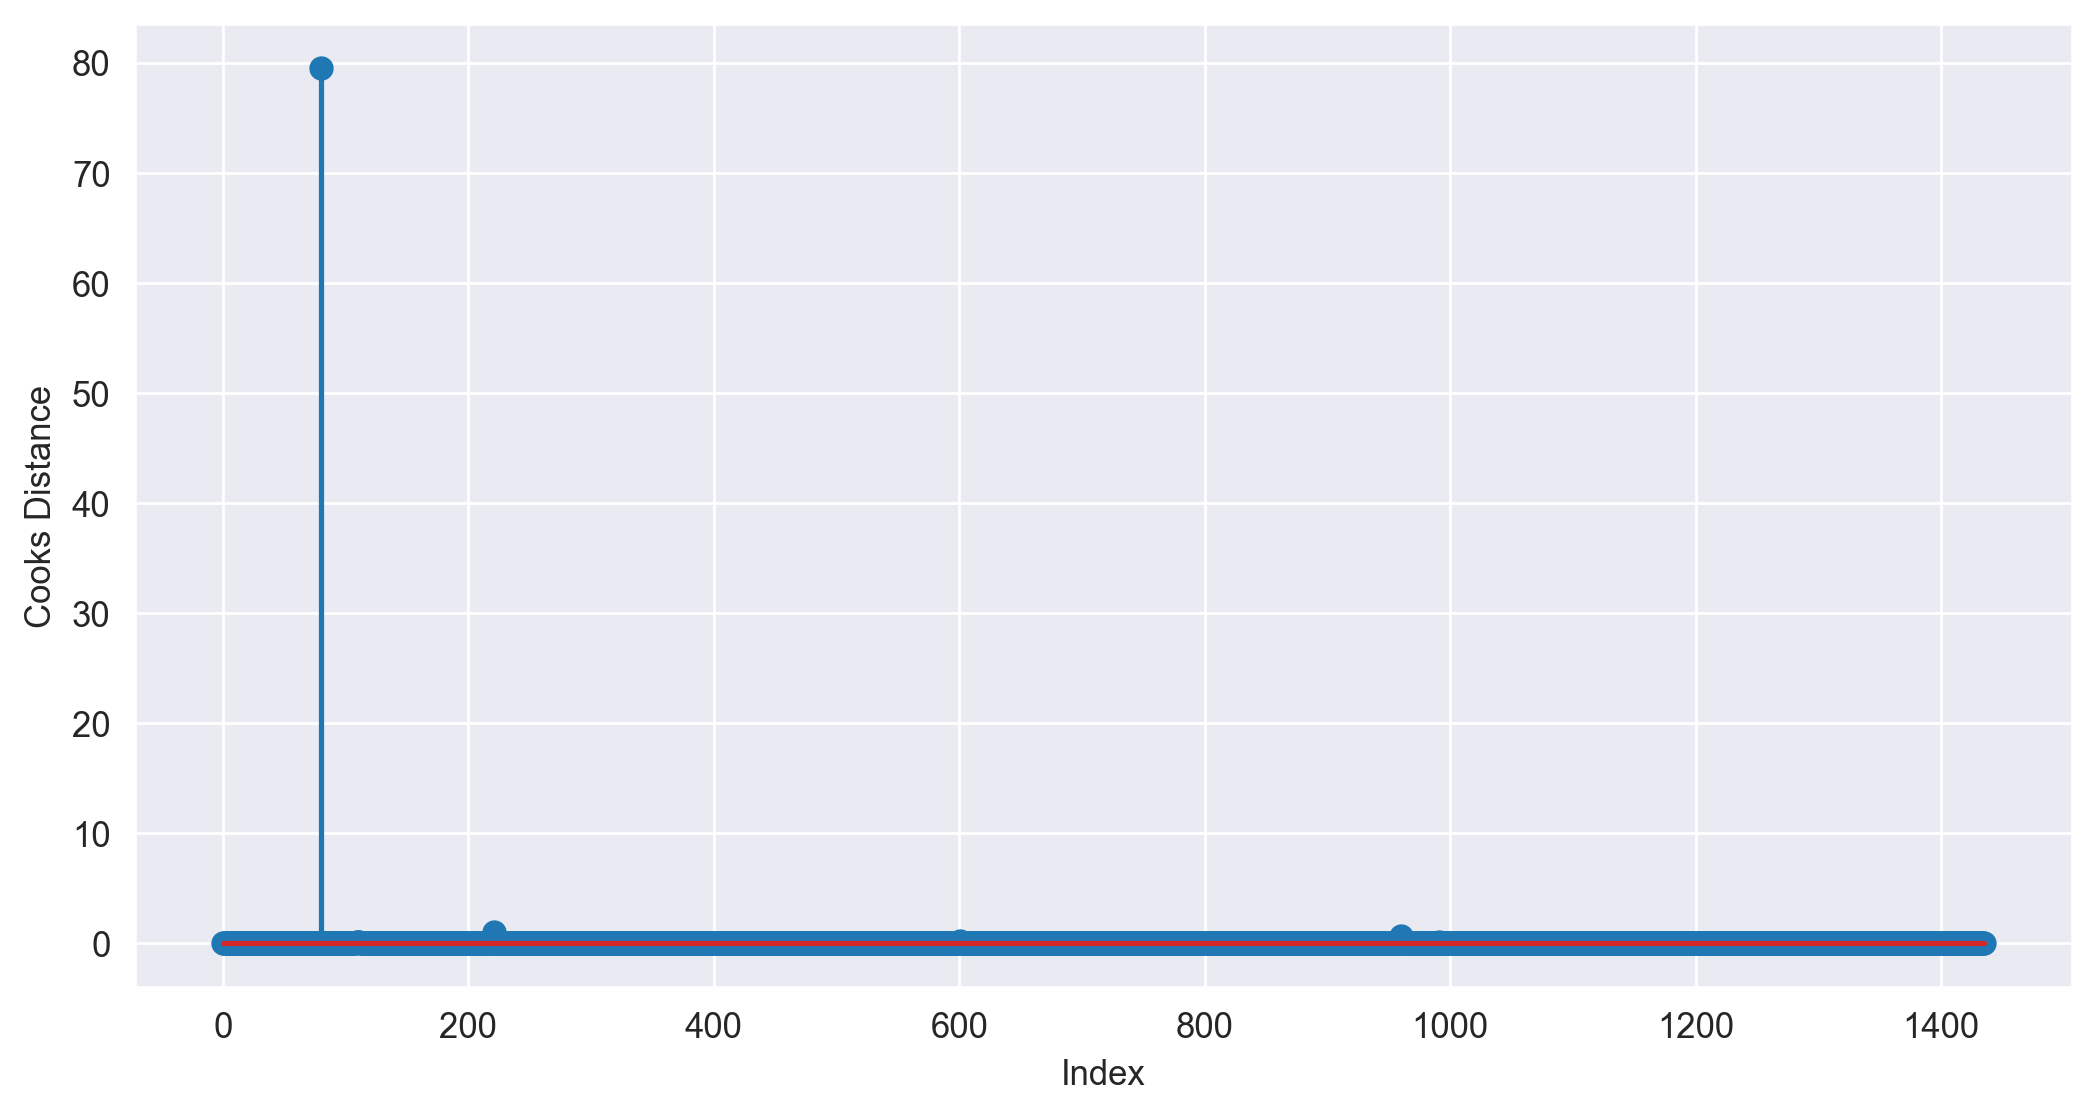

In [114]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [115]:
np.argmax(c),np.max(c)

(80, 79.5201062414156)

In [116]:
df.iloc[80]

Price            18950
Age_08_04           25
KM               20019
HP                 110
cc               16000
Doors                5
Gears                5
Quarterly_Tax      100
Weight            1180
Name: 80, dtype: int64

In [117]:
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [118]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

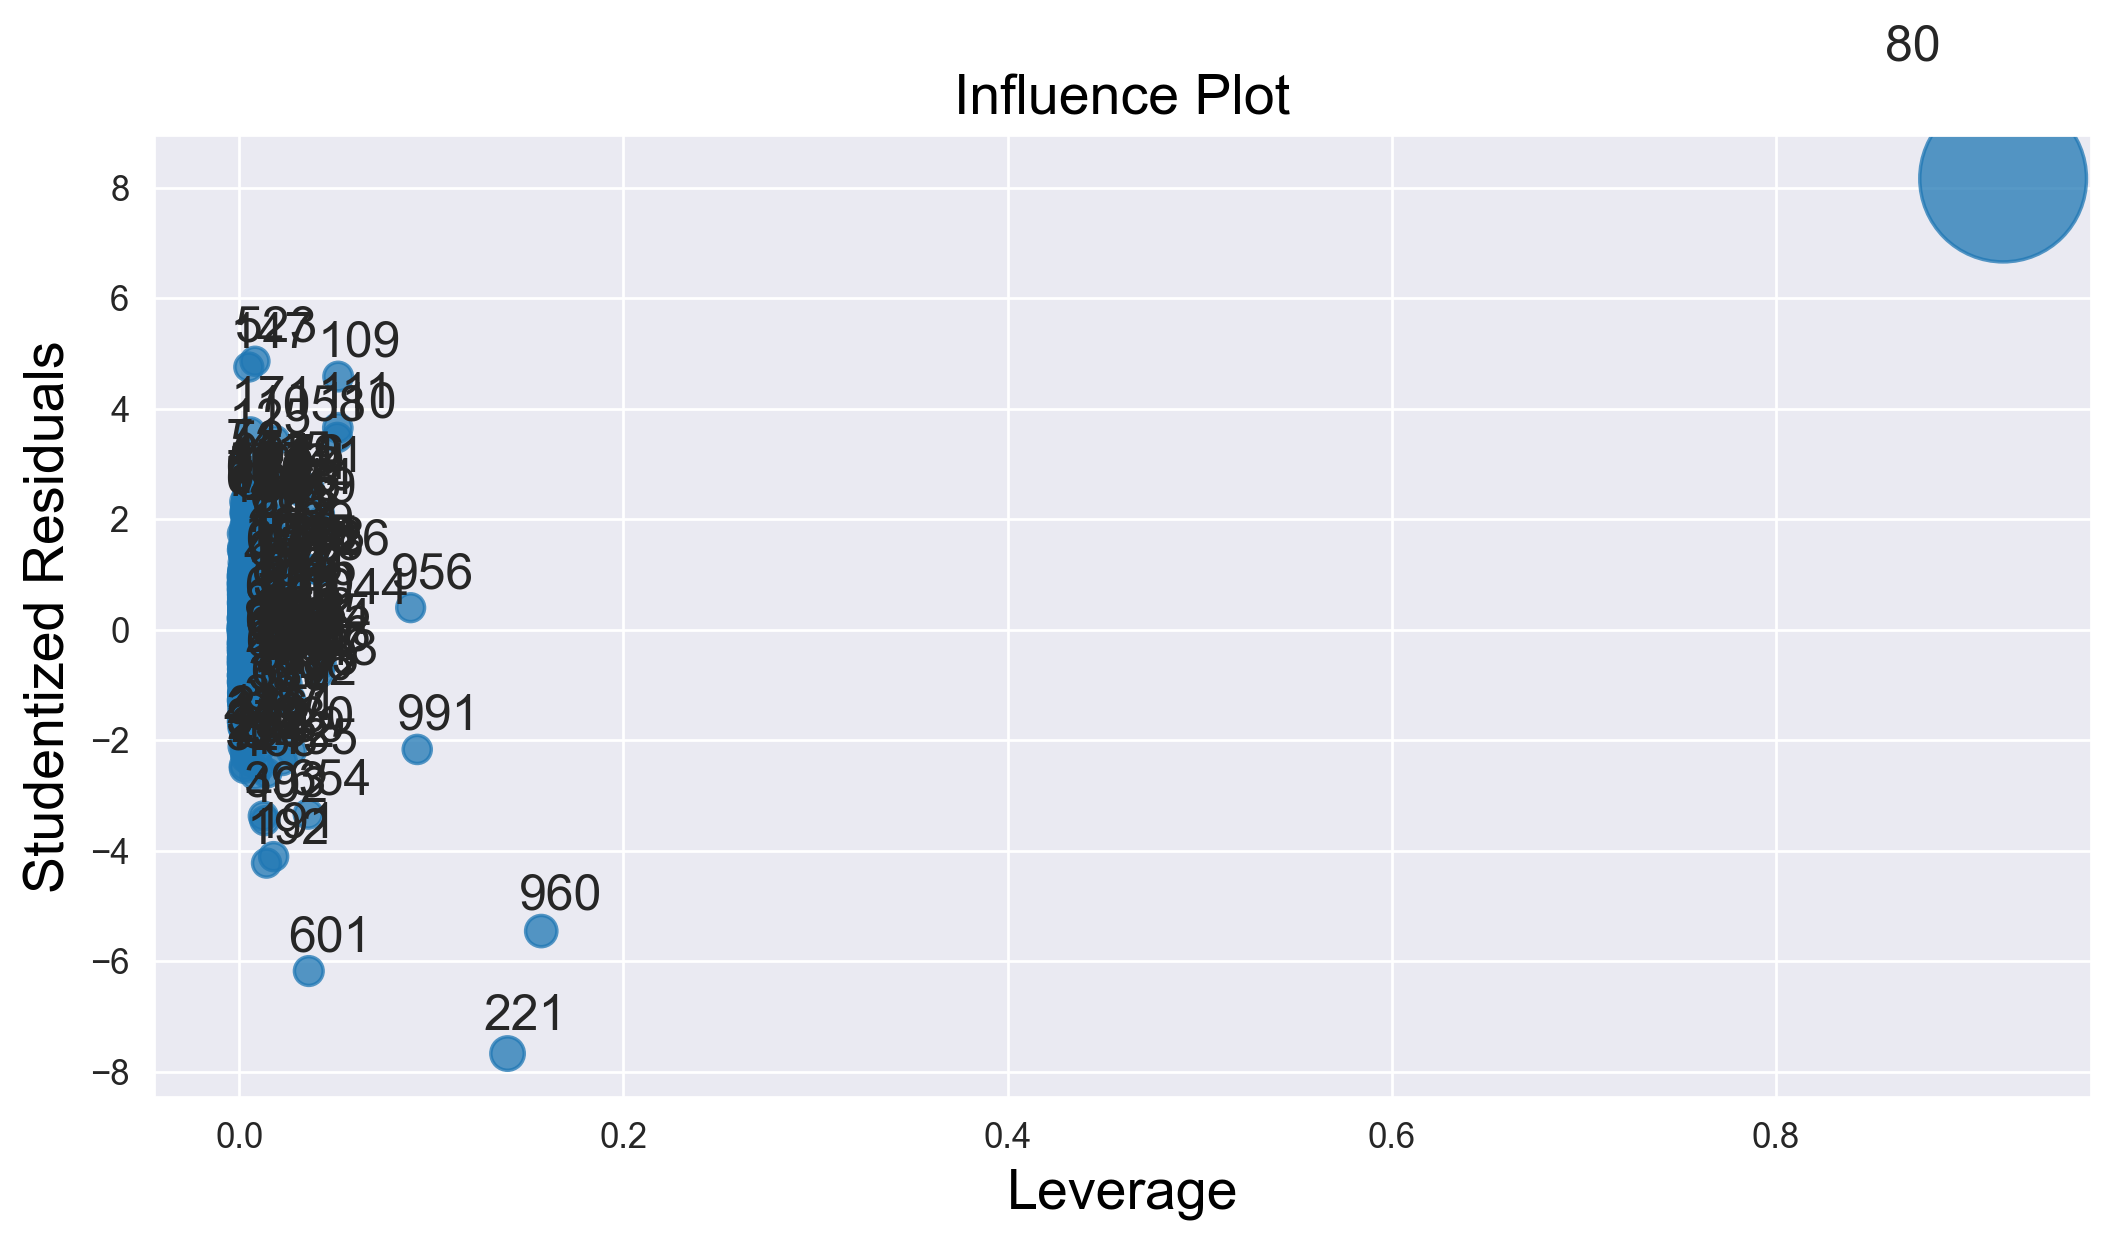

In [119]:
influence_plot(model);

In [120]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.020891364902506964

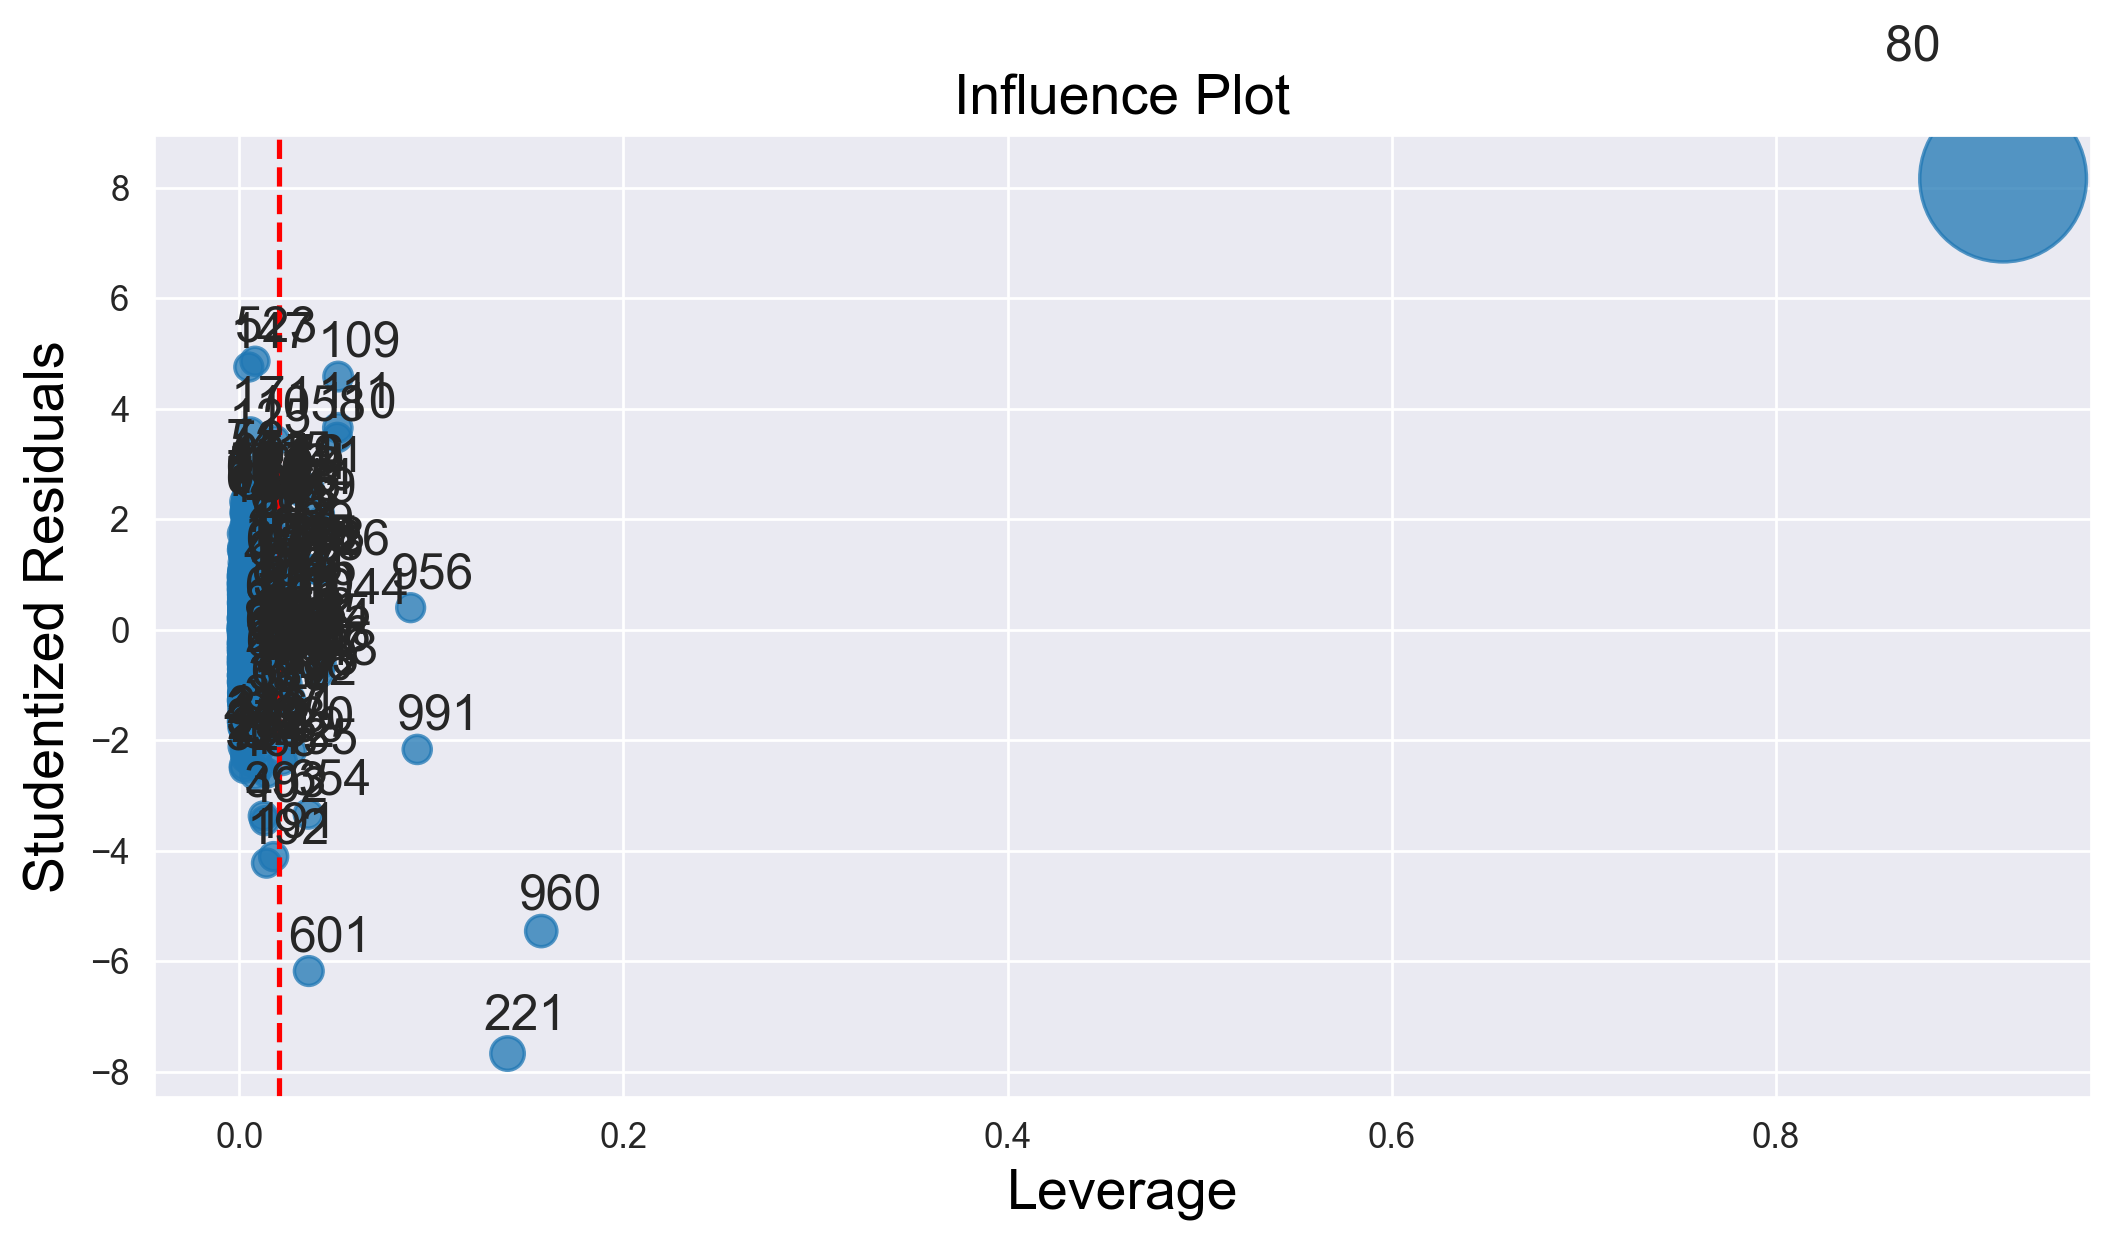

In [121]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

### Improving the model

In [122]:
df.iloc[80]# Influencer Data point

Price            18950
Age_08_04           25
KM               20019
HP                 110
cc               16000
Doors                5
Gears                5
Quarterly_Tax      100
Weight            1180
Name: 80, dtype: int64

In [123]:
df.drop(index=80,inplace=True)

In [124]:
df.reset_index(inplace=True)

In [125]:
df

index  Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0         0  13500         23  46986   90  2000      3      5            210   
1         1  13750         23  72937   90  2000      3      5            210   
2         2  13950         24  41711   90  2000      3      5            210   
3         3  14950         26  48000   90  2000      3      5            210   
4         4  13750         30  38500   90  2000      3      5            210   
...     ...    ...        ...    ...  ...   ...    ...    ...            ...   
1430   1431   7500         69  20544   86  1300      3      5             69   
1431   1432  10845         72  19000   86  1300      3      5             69   
1432   1433   8500         71  17016   86  1300      3      5             69   
1433   1434   7250         70  16916   86  1300      3      5             69   
1434   1435   6950         76      1  110  1600      5      5             19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1430    1025  
1431    1015  
1432    1015  
1433    1015  
1434    1114  

[1435 rows x 10 columns]

In [126]:
df.reset_index(inplace=True)

In [127]:
df

level_0  index  Price  Age_08_04     KM   HP    cc  Doors  Gears  \
0           0      0  13500         23  46986   90  2000      3      5   
1           1      1  13750         23  72937   90  2000      3      5   
2           2      2  13950         24  41711   90  2000      3      5   
3           3      3  14950         26  48000   90  2000      3      5   
4           4      4  13750         30  38500   90  2000      3      5   
...       ...    ...    ...        ...    ...  ...   ...    ...    ...   
1430     1430   1431   7500         69  20544   86  1300      3      5   
1431     1431   1432  10845         72  19000   86  1300      3      5   
1432     1432   1433   8500         71  17016   86  1300      3      5   
1433     1433   1434   7250         70  16916   86  1300      3      5   
1434     1434   1435   6950         76      1  110  1600      5      5   

      Quarterly_Tax  Weight  
0               210    1165  
1               210    1165  
2               210    1165  
3               210    1165  
4               210    1170  
...             ...     ...  
1430             69    1025  
1431             69    1015  
1432             69    1015  
1433             69    1015  
1434             19    1114  

[1435 rows x 11 columns]

In [128]:
df.drop(columns=['index'], inplace=True)

In [129]:
df

level_0  Price  Age_08_04     KM   HP    cc  Doors  Gears  \
0           0  13500         23  46986   90  2000      3      5   
1           1  13750         23  72937   90  2000      3      5   
2           2  13950         24  41711   90  2000      3      5   
3           3  14950         26  48000   90  2000      3      5   
4           4  13750         30  38500   90  2000      3      5   
...       ...    ...        ...    ...  ...   ...    ...    ...   
1430     1430   7500         69  20544   86  1300      3      5   
1431     1431  10845         72  19000   86  1300      3      5   
1432     1432   8500         71  17016   86  1300      3      5   
1433     1433   7250         70  16916   86  1300      3      5   
1434     1434   6950         76      1  110  1600      5      5   

      Quarterly_Tax  Weight  
0               210    1165  
1               210    1165  
2               210    1165  
3               210    1165  
4               210    1170  
...             ...     ...  
1430             69    1025  
1431             69    1015  
1432             69    1015  
1433             69    1015  
1434             19    1114  

[1435 rows x 10 columns]

In [130]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df).fit()

In [131]:
final_model.rsquared

0.8693790488655819

### Predicting for new records

In [132]:
test = pd.DataFrame({
    'Age_08_04' : [15,12,20,25],
    'KM' : [23000,24000,15000,18000],
    'HP' : [110,90,80,100],
    'cc' : [2000, 3000, 4000, 5000],
    'Doors' : [3,3,5,5,],
    'Gears': [5,5,5,5],
    'Quarterly_Tax': [210, 50, 60, 70],
    'Weight':[1000, 1100, 1220, 1150]
    
})

In [133]:
final_model.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [134]:
test

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0         15  23000  110  2000      3      5            210    1000
1         12  24000   90  3000      3      5             50    1100
2         20  15000   80  4000      5      5             60    1220
3         25  18000  100  5000      5      5             70    1150

In [135]:
final_model.predict(test)

0    15380.370672
1    12982.295081
2    11717.488872
3     8003.274307
dtype: float64

### Problem Statement 2

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [172]:
#read the data
df = pd.read_csv('50_Startups.csv')
df

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [173]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [175]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [176]:
df.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

In [177]:
df.rename(columns = {'R&D Spend':'R_and_D_Spend', 'Marketing Spend':'Marketing_Spend'}, inplace = True)
df

R_and_D_Spend  Administration  Marketing_Spend       State     Profit
0       165349.20       136897.80        471784.10    New York  192261.83
1       162597.70       151377.59        443898.53  California  191792.06
2       153441.51       101145.55        407934.54     Florida  191050.39
3       144372.41       118671.85        383199.62    New York  182901.99
4       142107.34        91391.77        366168.42     Florida  166187.94
5       131876.90        99814.71        362861.36    New York  156991.12
6       134615.46       147198.87        127716.82  California  156122.51
7       130298.13       145530.06        323876.68     Florida  155752.60
8       120542.52       148718.95        311613.29    New York  152211.77
9       123334.88       108679.17        304981.62  California  149759.96
10      101913.08       110594.11        229160.95     Florida  146121.95
11      100671.96        91790.61        249744.55  California  144259.40
12       93863.75       127320.38        249839.44     Florida  141585.52
13       91992.39       135495.07        252664.93  California  134307.35
14      119943.24       156547.42        256512.92     Florida  132602.65
15      114523.61       122616.84        261776.23    New York  129917.04
16       78013.11       121597.55        264346.06  California  126992.93
17       94657.16       145077.58        282574.31    New York  125370.37
18       91749.16       114175.79        294919.57     Florida  124266.90
19       86419.70       153514.11             0.00    New York  122776.86
20       76253.86       113867.30        298664.47  California  118474.03
21       78389.47       153773.43        299737.29    New York  111313.02
22       73994.56       122782.75        303319.26     Florida  110352.25
23       67532.53       105751.03        304768.73     Florida  108733.99
24       77044.01        99281.34        140574.81    New York  108552.04
25       64664.71       139553.16        137962.62  California  107404.34
26       75328.87       144135.98        134050.07     Florida  105733.54
27       72107.60       127864.55        353183.81    New York  105008.31
28       66051.52       182645.56        118148.20     Florida  103282.38
29       65605.48       153032.06        107138.38    New York  101004.64
30       61994.48       115641.28         91131.24     Florida   99937.59
31       61136.38       152701.92         88218.23    New York   97483.56
32       63408.86       129219.61         46085.25  California   97427.84
33       55493.95       103057.49        214634.81     Florida   96778.92
34       46426.07       157693.92        210797.67  California   96712.80
35       46014.02        85047.44        205517.64    New York   96479.51
36       28663.76       127056.21        201126.82     Florida   90708.19
37       44069.95        51283.14        197029.42  California   89949.14
38       20229.59        65947.93        185265.10    New York   81229.06
39       38558.51        82982.09        174999.30  California   81005.76
40       28754.33       118546.05        172795.67  California   78239.91
41       27892.92        84710.77        164470.71     Florida   77798.83
42       23640.93        96189.63        148001.11  California   71498.49
43       15505.73       127382.30         35534.17    New York   69758.98
44       22177.74       154806.14         28334.72  California   65200.33
45        1000.23       124153.04          1903.93    New York   64926.08
46        1315.46       115816.21        297114.46     Florida   49490.75
47           0.00       135426.92             0.00  California   42559.73
48         542.05        51743.15             0.00    New York   35673.41
49           0.00       116983.80         45173.06  California   14681.40

<Axes: >

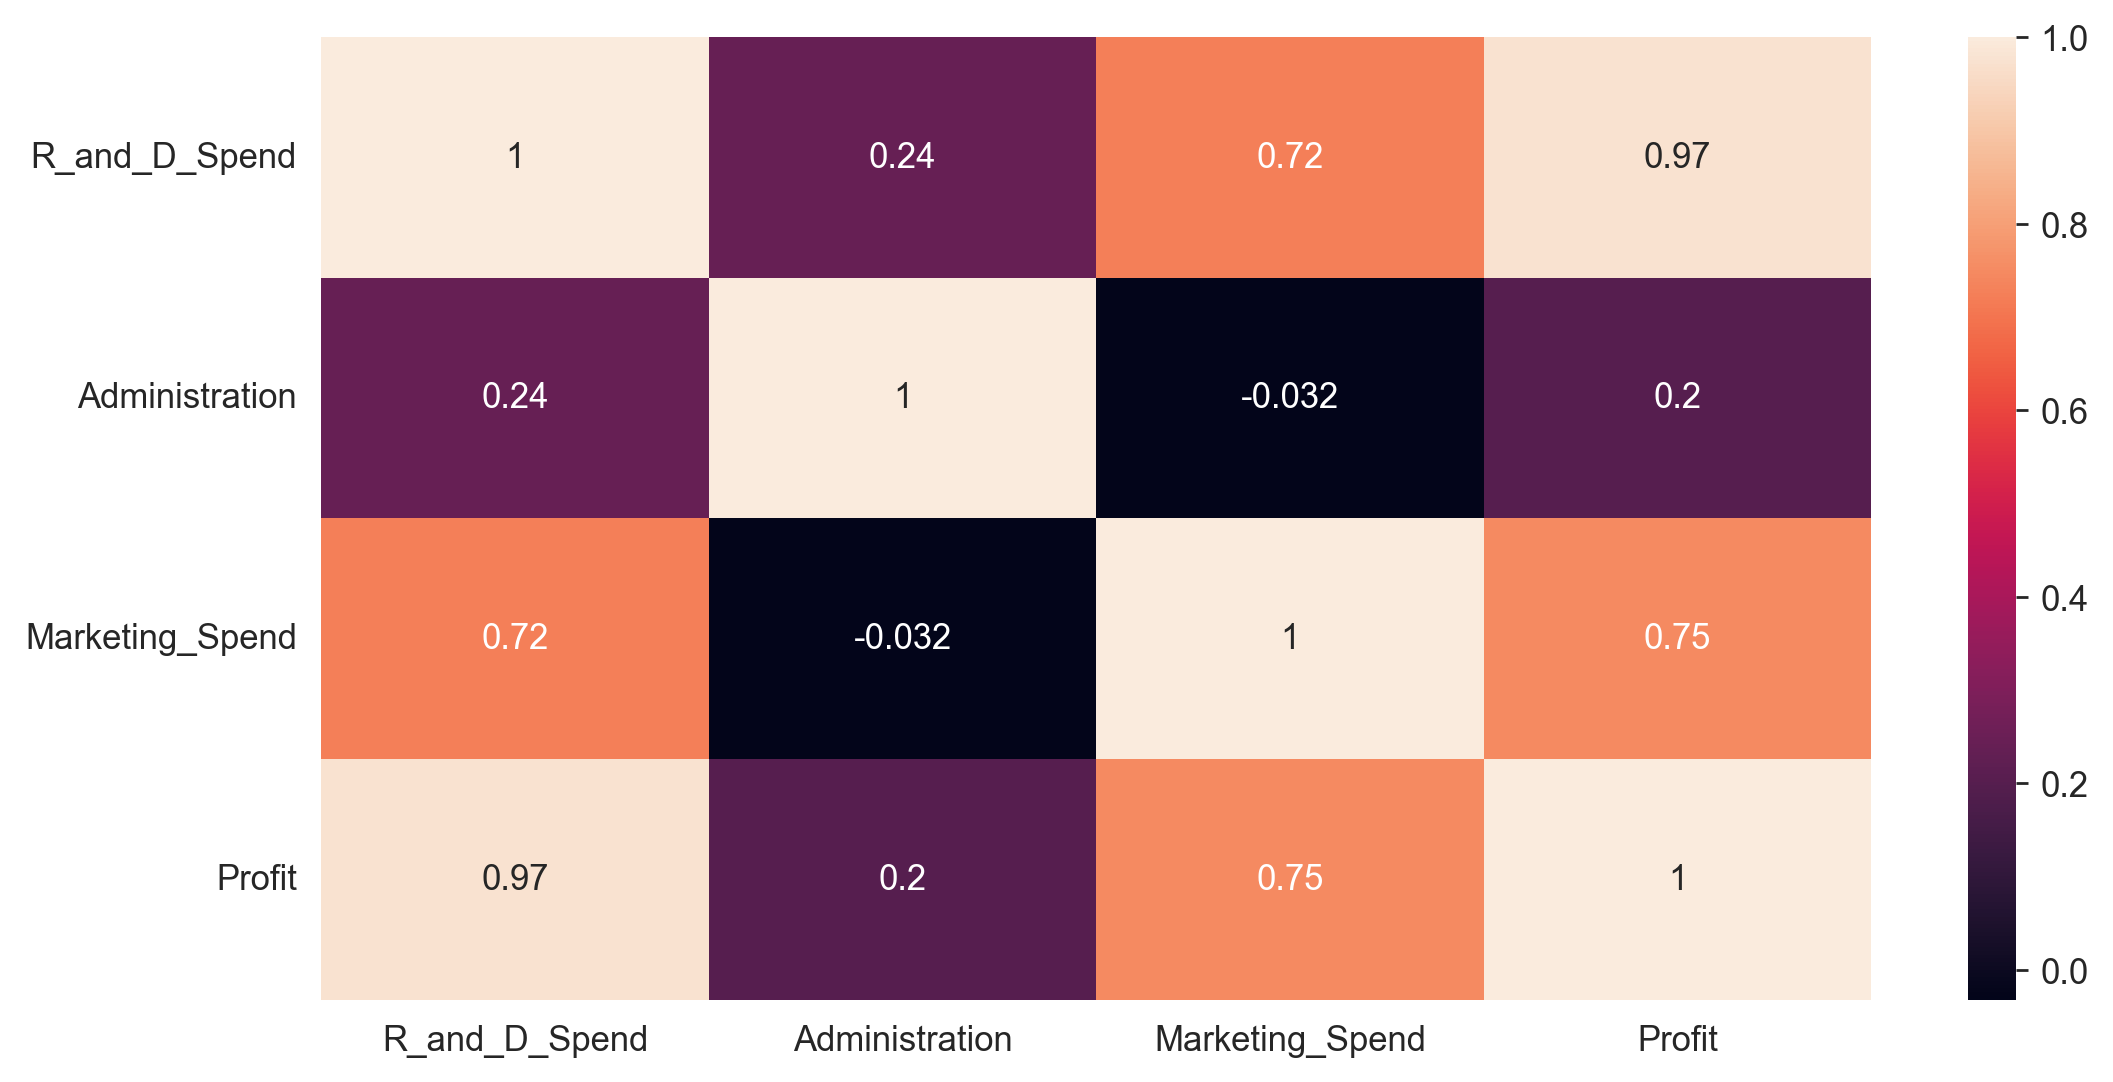

In [178]:
#Correlation
sns.heatmap(df.corr(),annot=True)

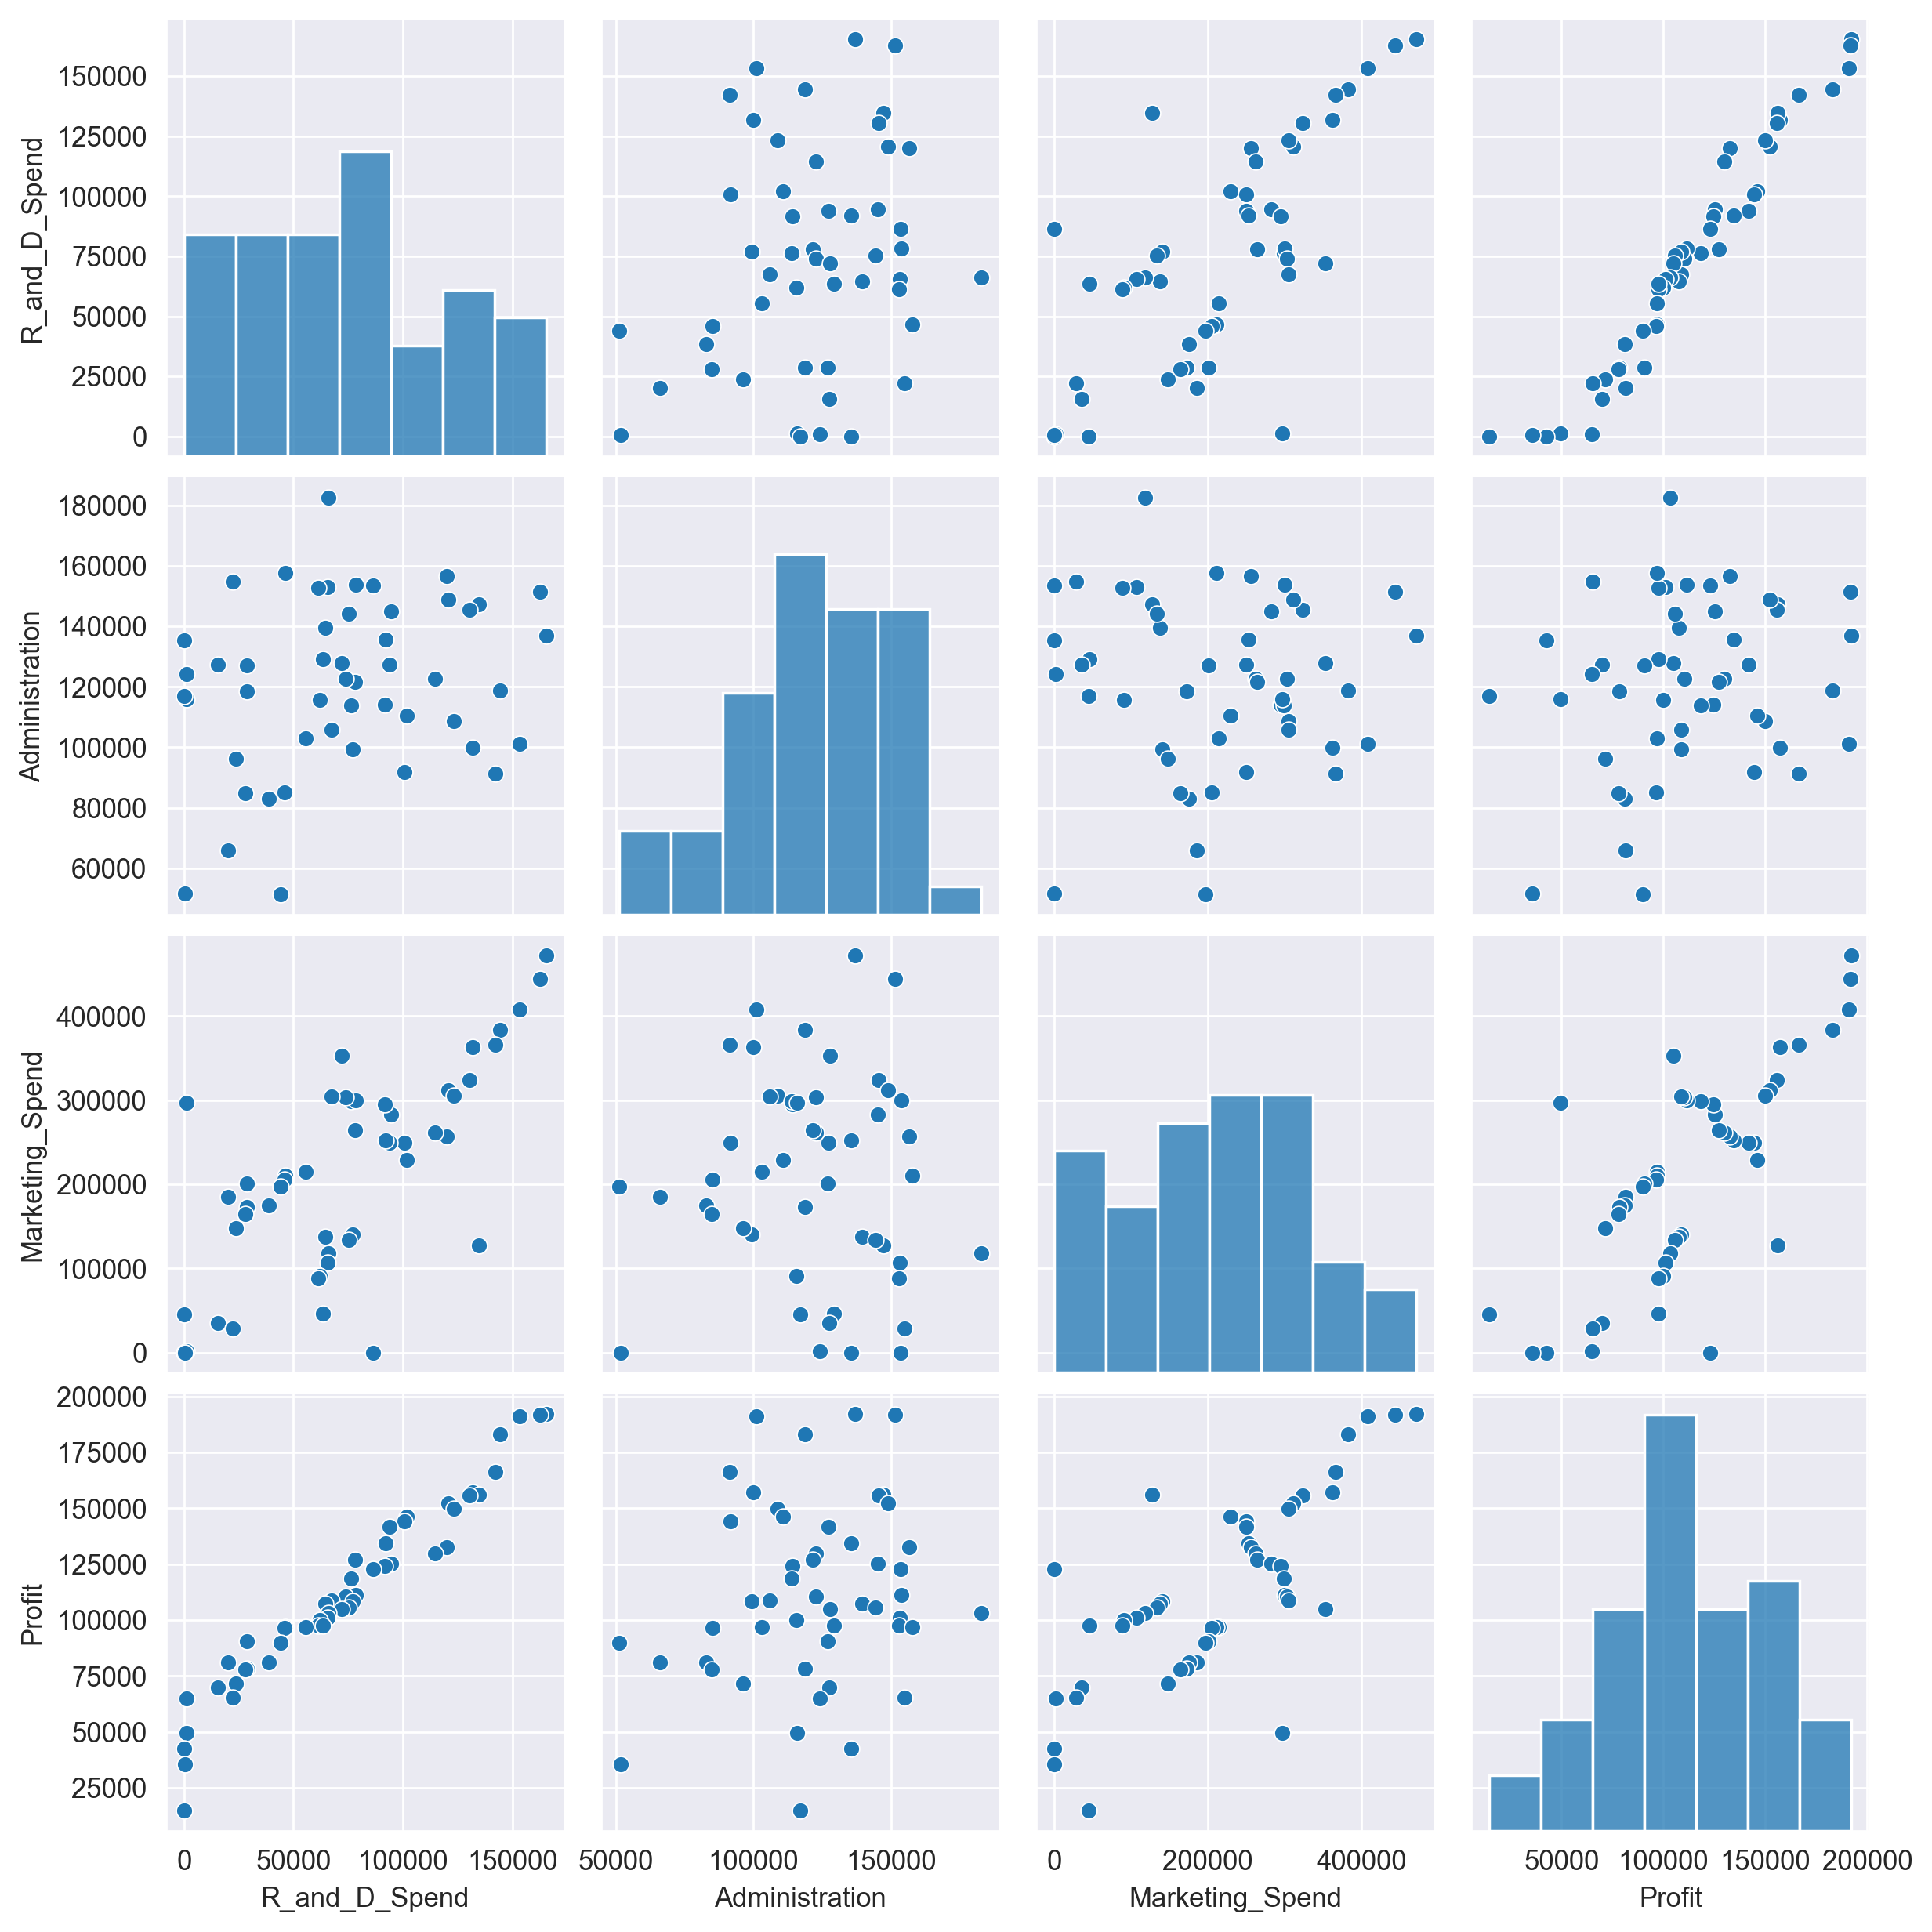

In [179]:
sns.pairplot(df)

In [180]:
### Model Buiding

model1 = smf.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend',data=df).fit()

In [181]:
model1.pvalues

Intercept          1.057379e-09
R_and_D_Spend      2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [183]:
model1.params

Intercept          50122.192990
R_and_D_Spend          0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

- Intercept          50122.192990
- R_and_D_Spend          0.805715 (Not affecting target column)
- Administration        -0.026816
- Marketing_Spend        0.027228

In [185]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [187]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        10:19:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D_Spend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
#Simple Linear Regression Models

In [210]:
ml_a=smf.ols('Profit~Administration',data = df).fit()  

print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [211]:
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 14 Jan 2024   Prob (F-statistic):              0.162
Time:                        11:18:47   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
ml_m=smf.ols('Profit~Marketing_Spend',data = df).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [214]:
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.38e-10
Time:                        11:20:11   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
ml_am=smf.ols('Profit~Administration+Marketing_Spend',data = df).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues)

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [217]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           2.50e-10
Time:                        11:21:11   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
#Calculating VIF

In [241]:
rsq_R_and_D_Spend = smf.ols('R_and_D_Spend~Administration+Marketing_Spend',data=df).fit().rsquared  
vif_R_and_D_Spend = 1/(1-rsq_R_and_D_Spend) 

rsq_Administration = smf.ols('Administration~R_and_D_Spend+Marketing_Spend',data=df).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~R_and_D_Spend+Administration',data=df).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

In [242]:
#Storing vif values in a data frame
d1 = {'Variables':['R_and_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_RDSpend,vif_Administration,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0    R_and_D_Spend  2.468903
1   Administration  1.175091
2  Marketing_Spend  2.326773

In [243]:
#Residual Analysis

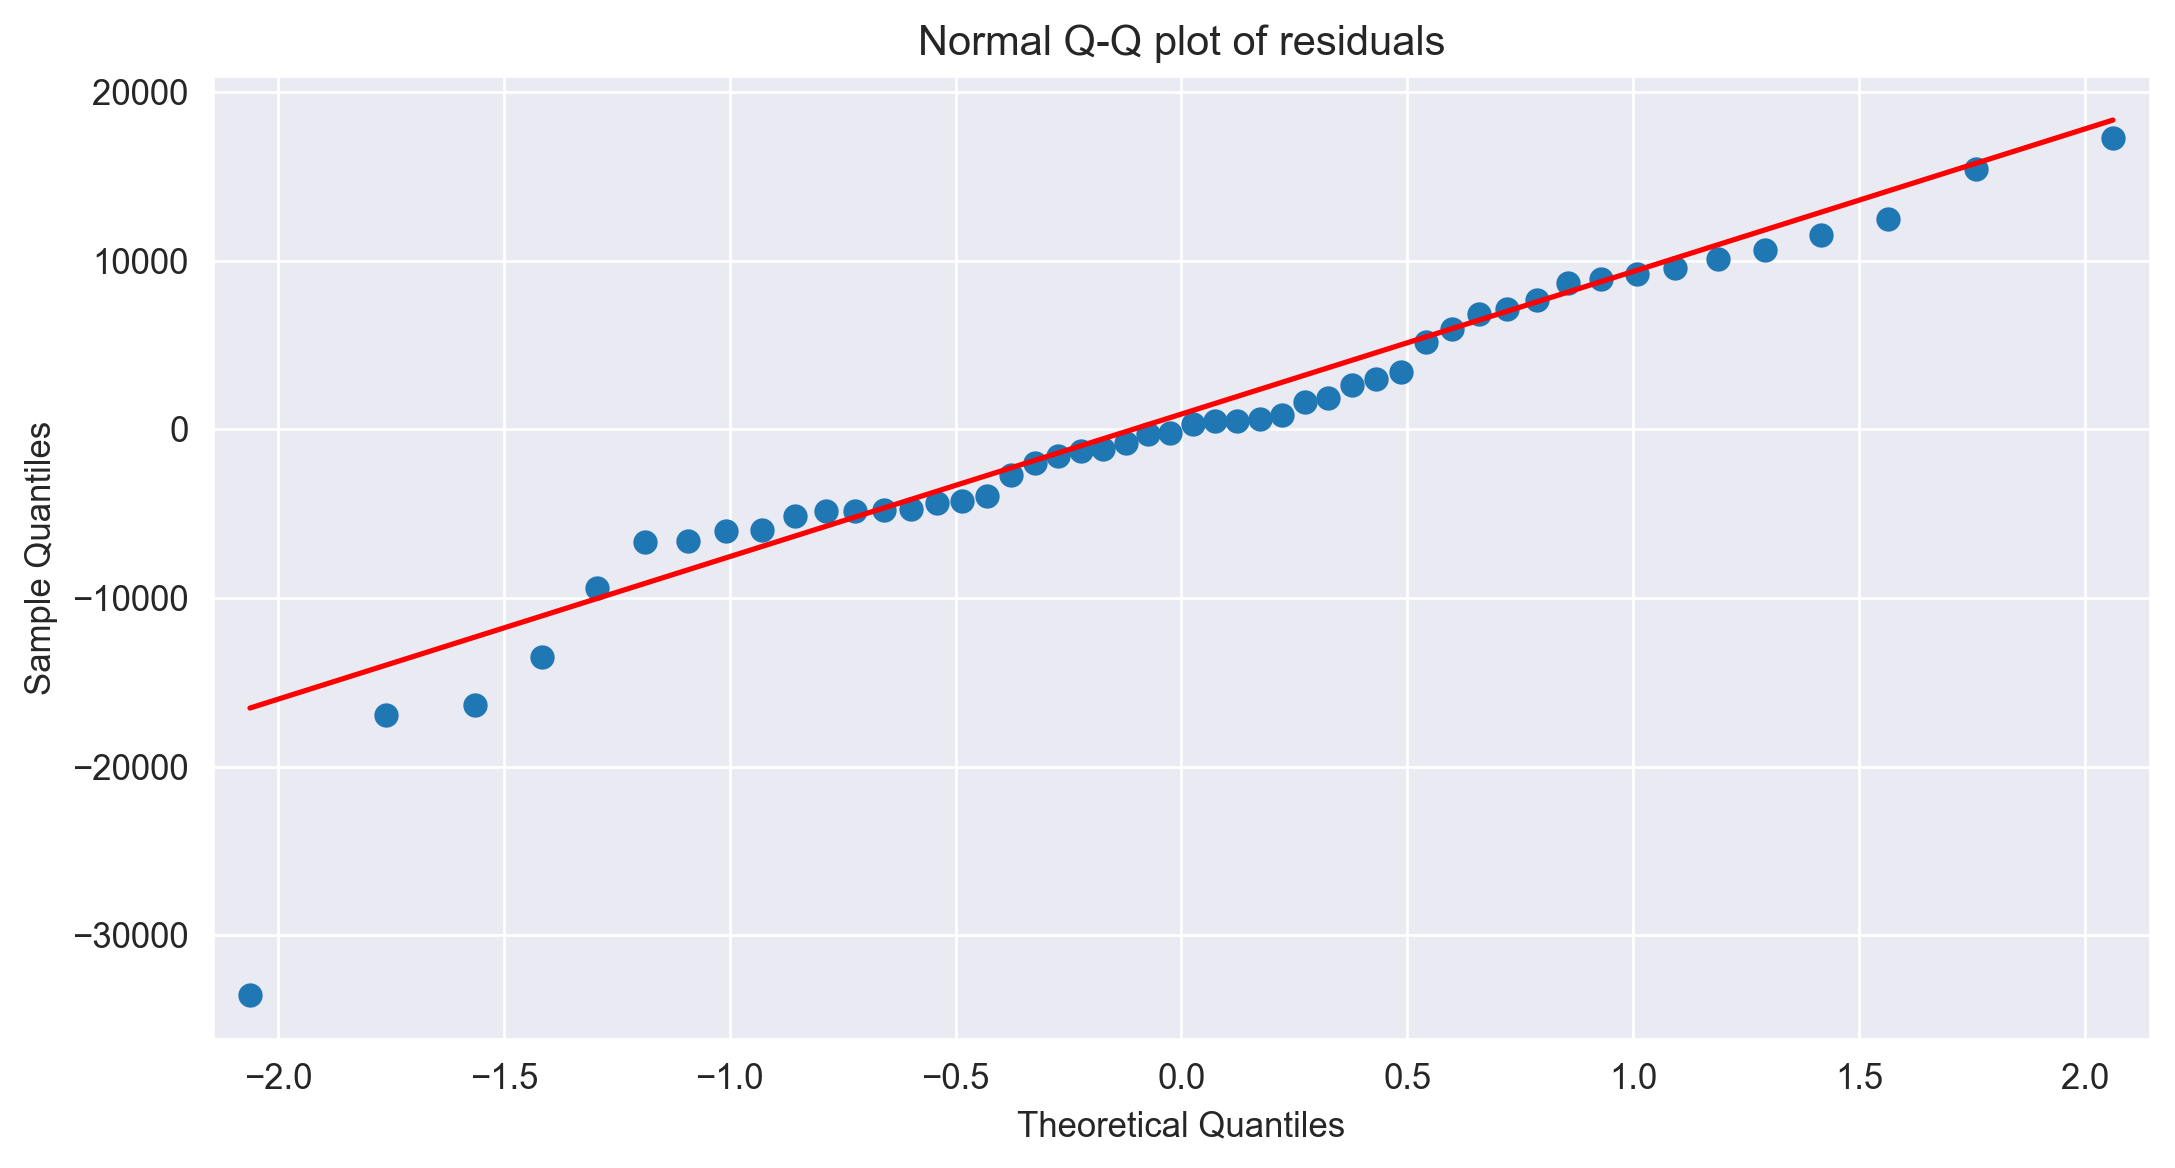

In [244]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [245]:
list(np.where(model.resid>5)) 

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [246]:
#Residual Plot for Homoscedasticity

In [247]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

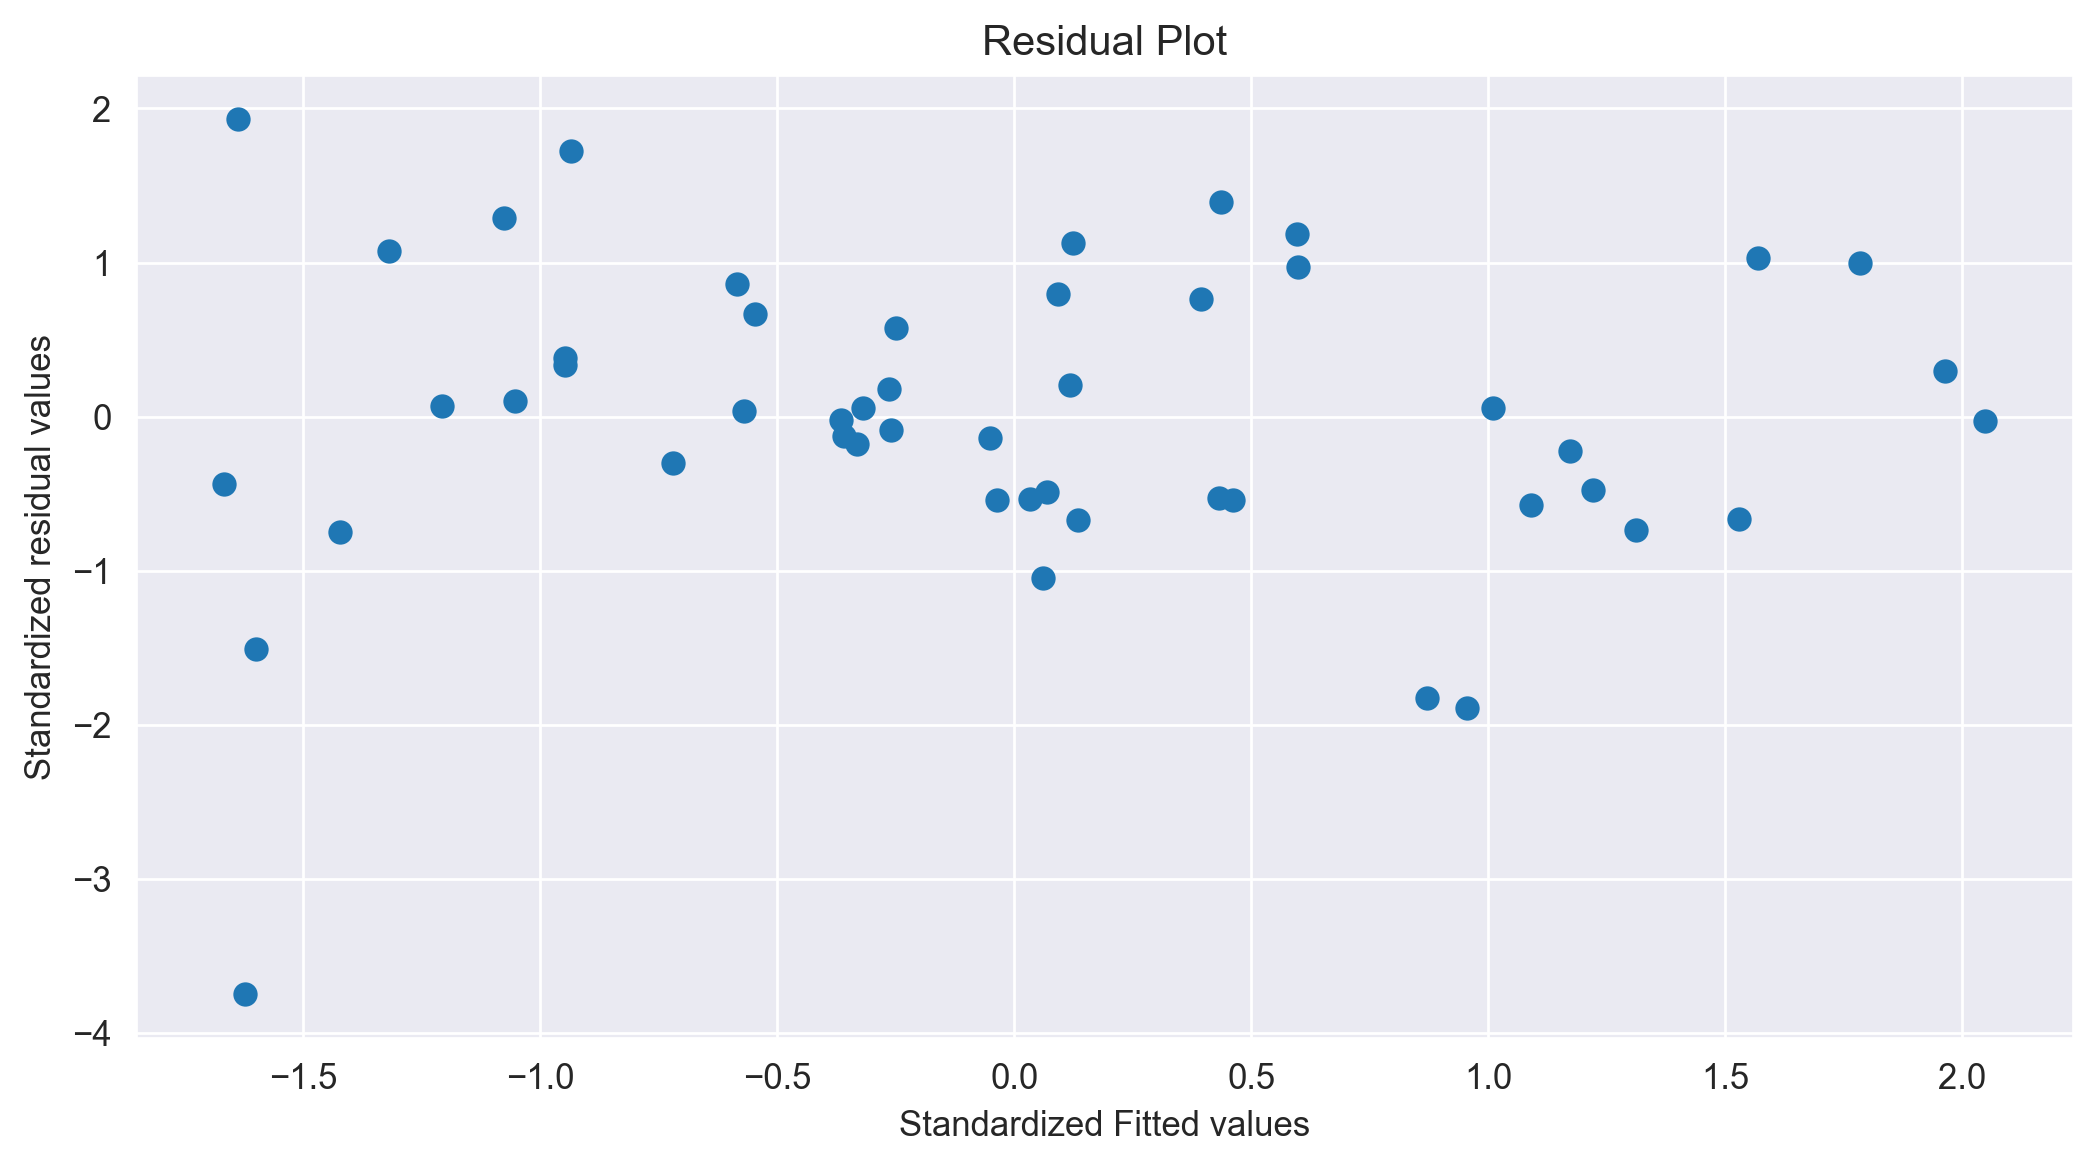

In [248]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

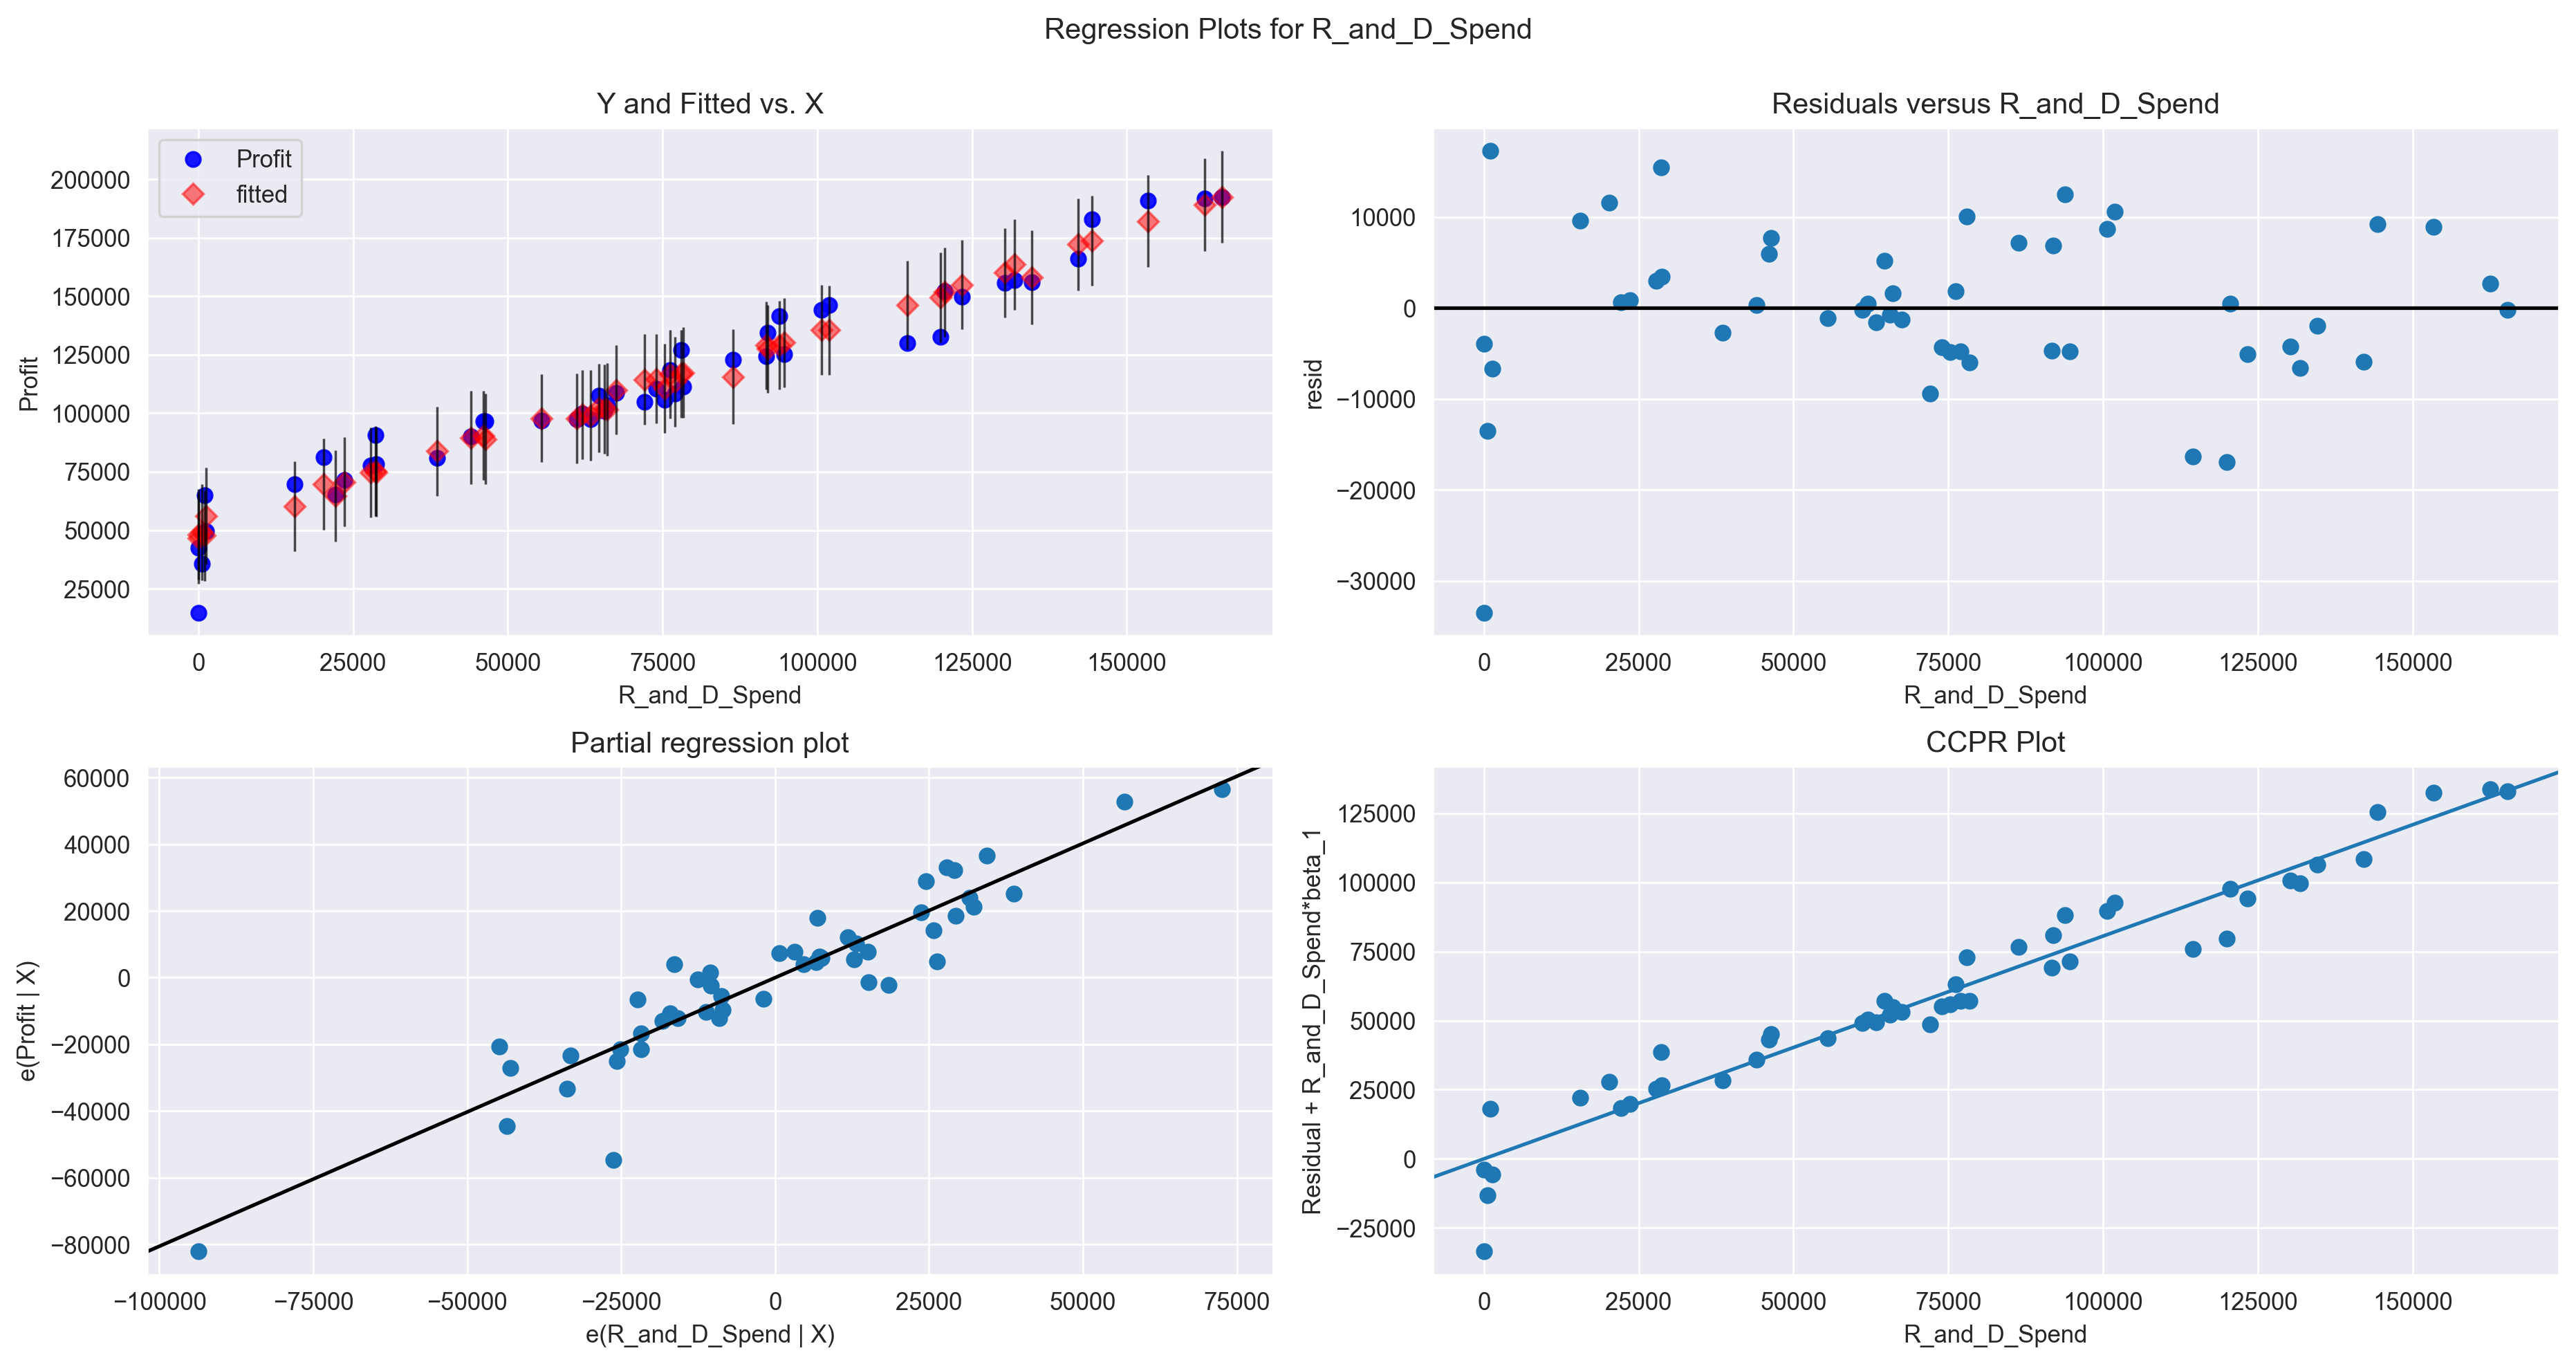

In [250]:
#Residual vs Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "R_and_D_Spend", fig=fig)
plt.show()

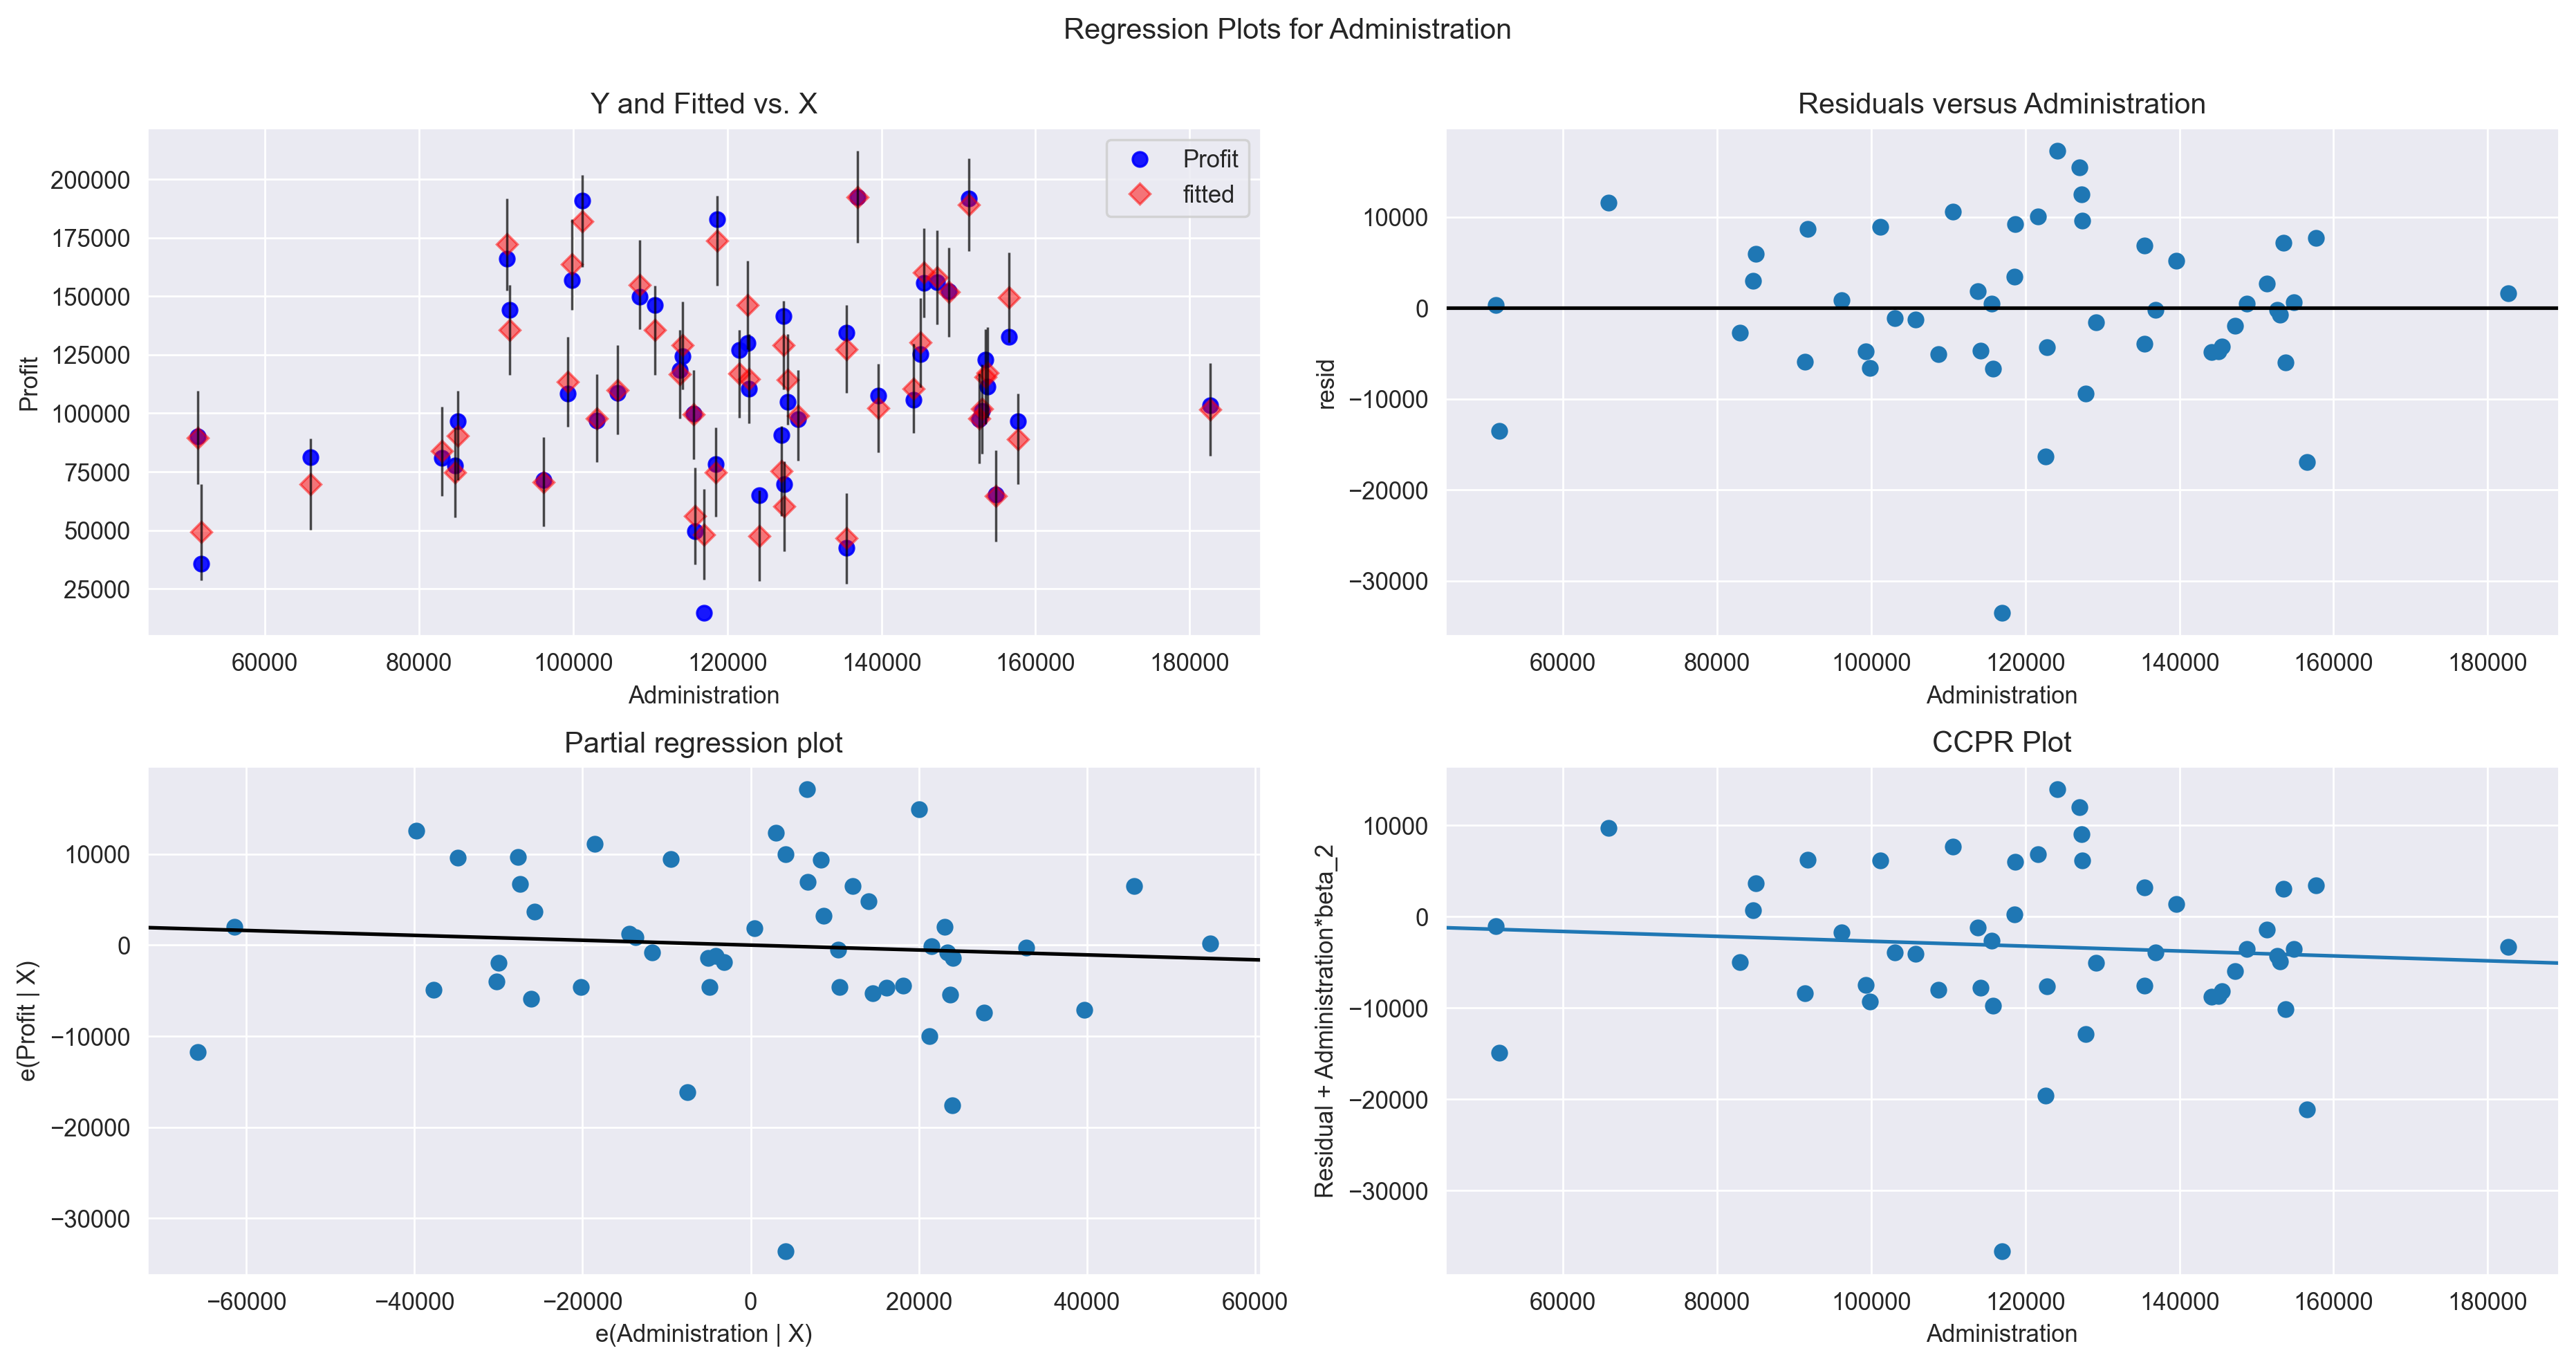

In [251]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

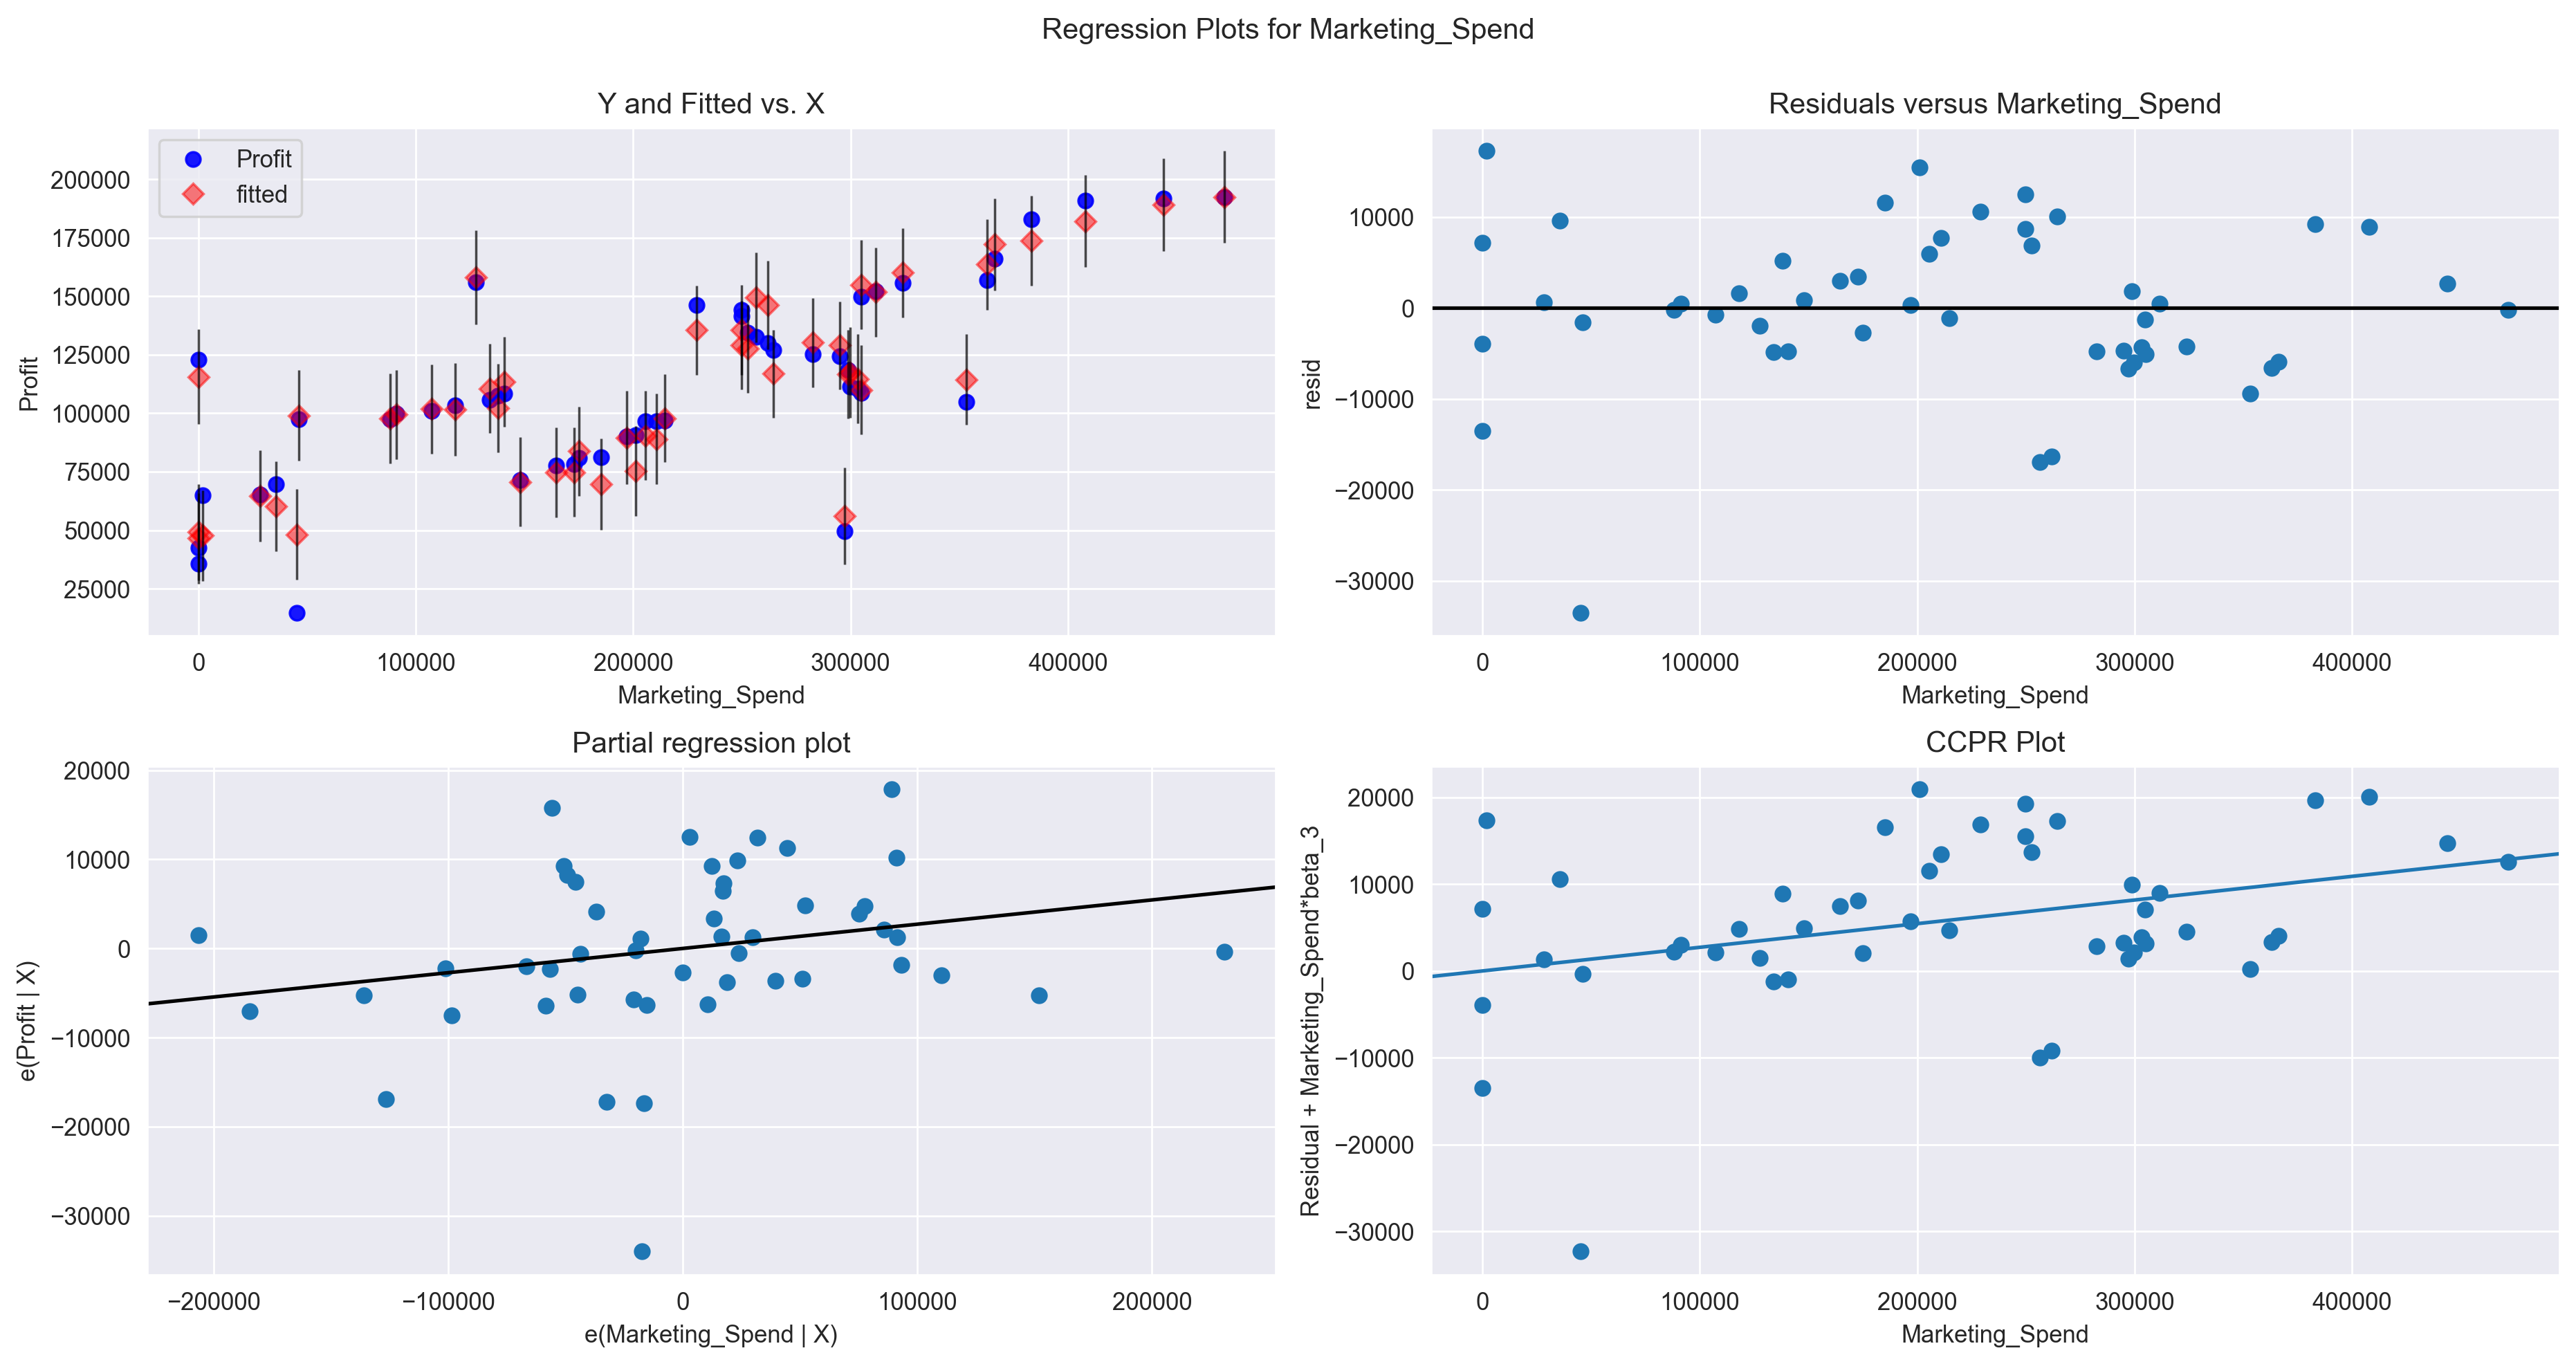

In [252]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Marketing_Spend", fig=fig)
plt.show()

In [254]:
#Model Deletion Diagnostics
##Detecting Influencers/Outliers
#Cook’s Distance

In [255]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

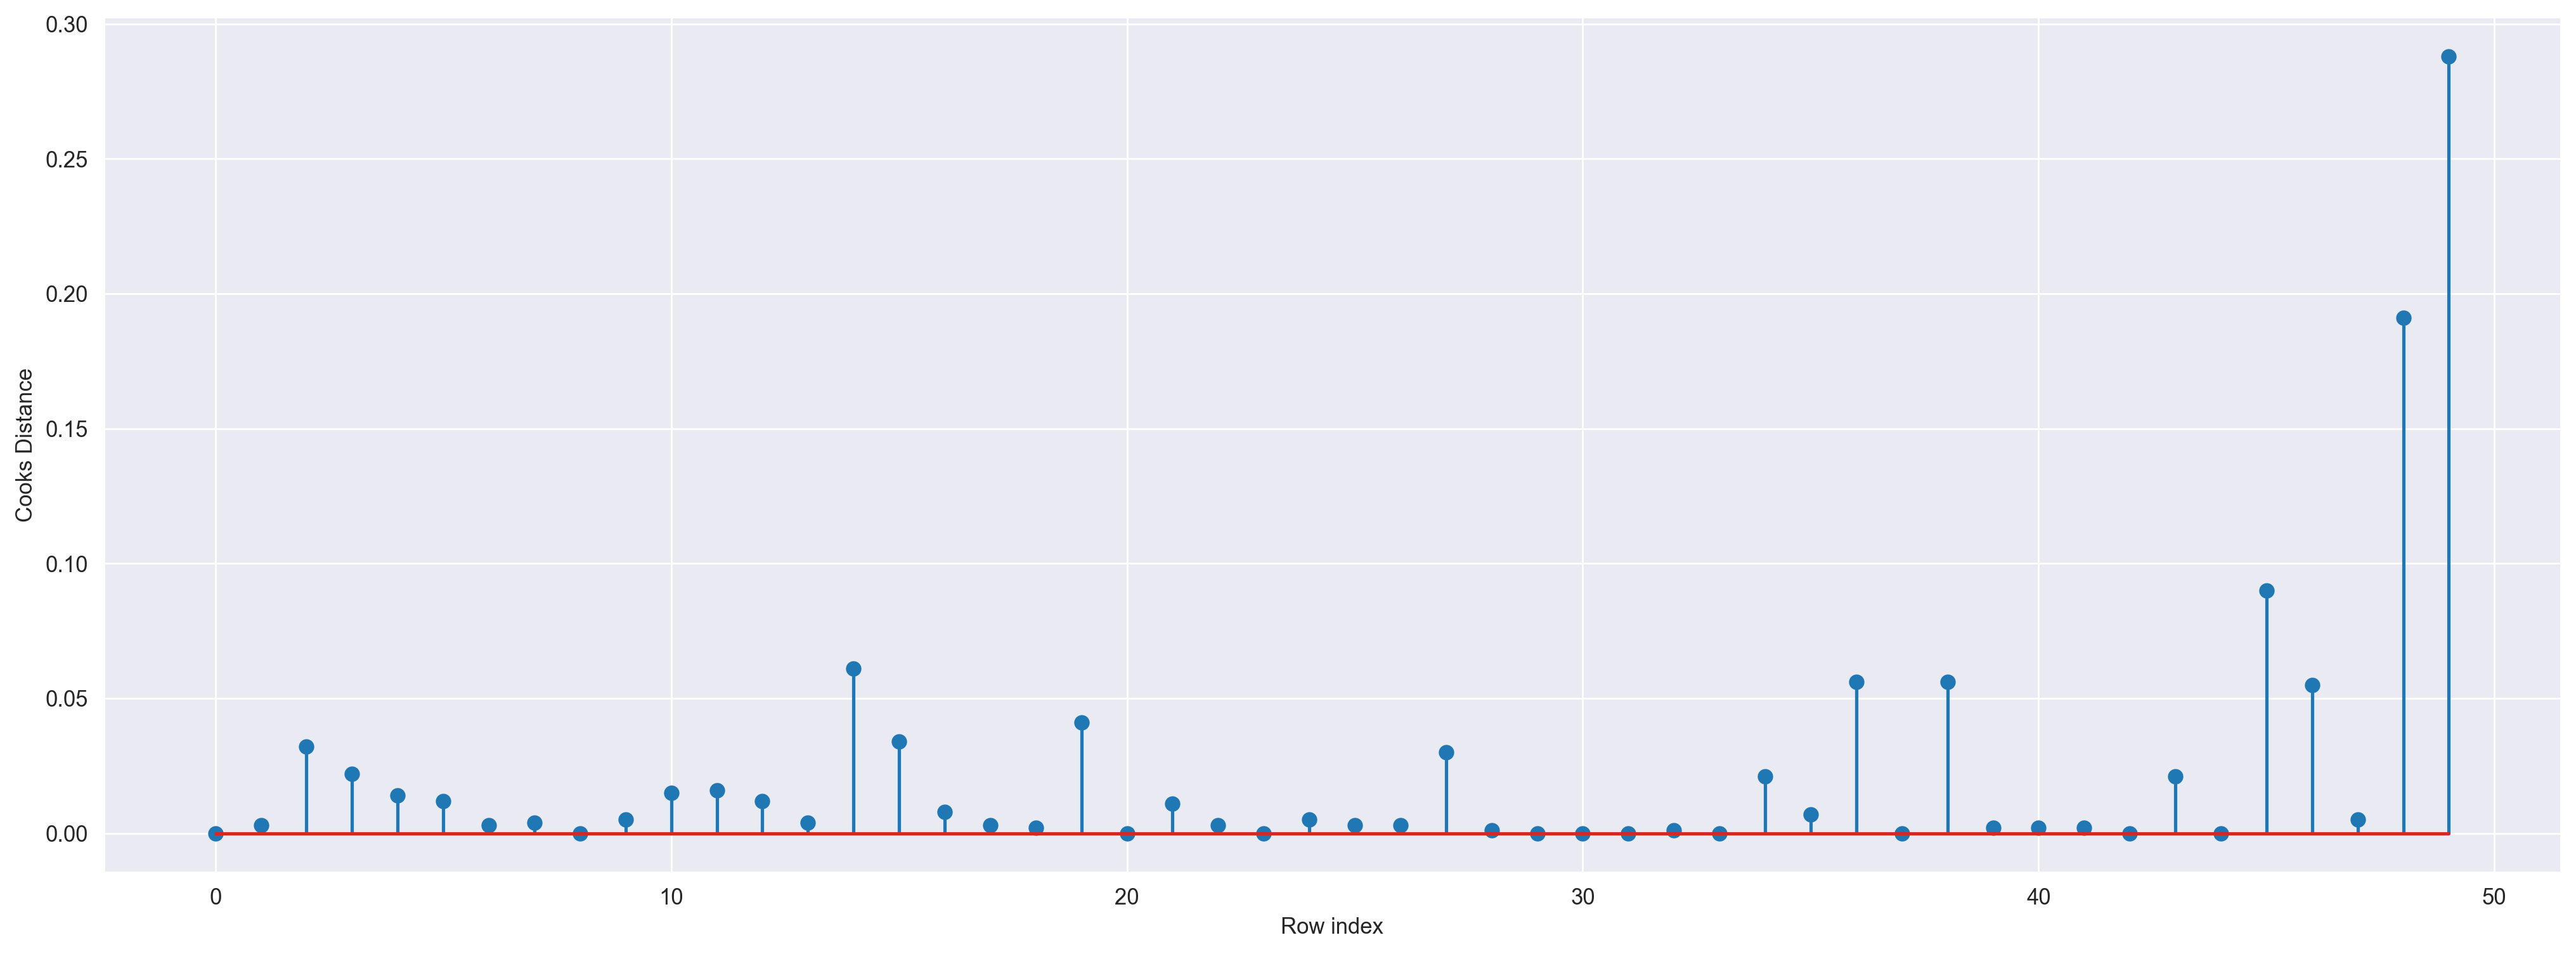

In [256]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [257]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543276)

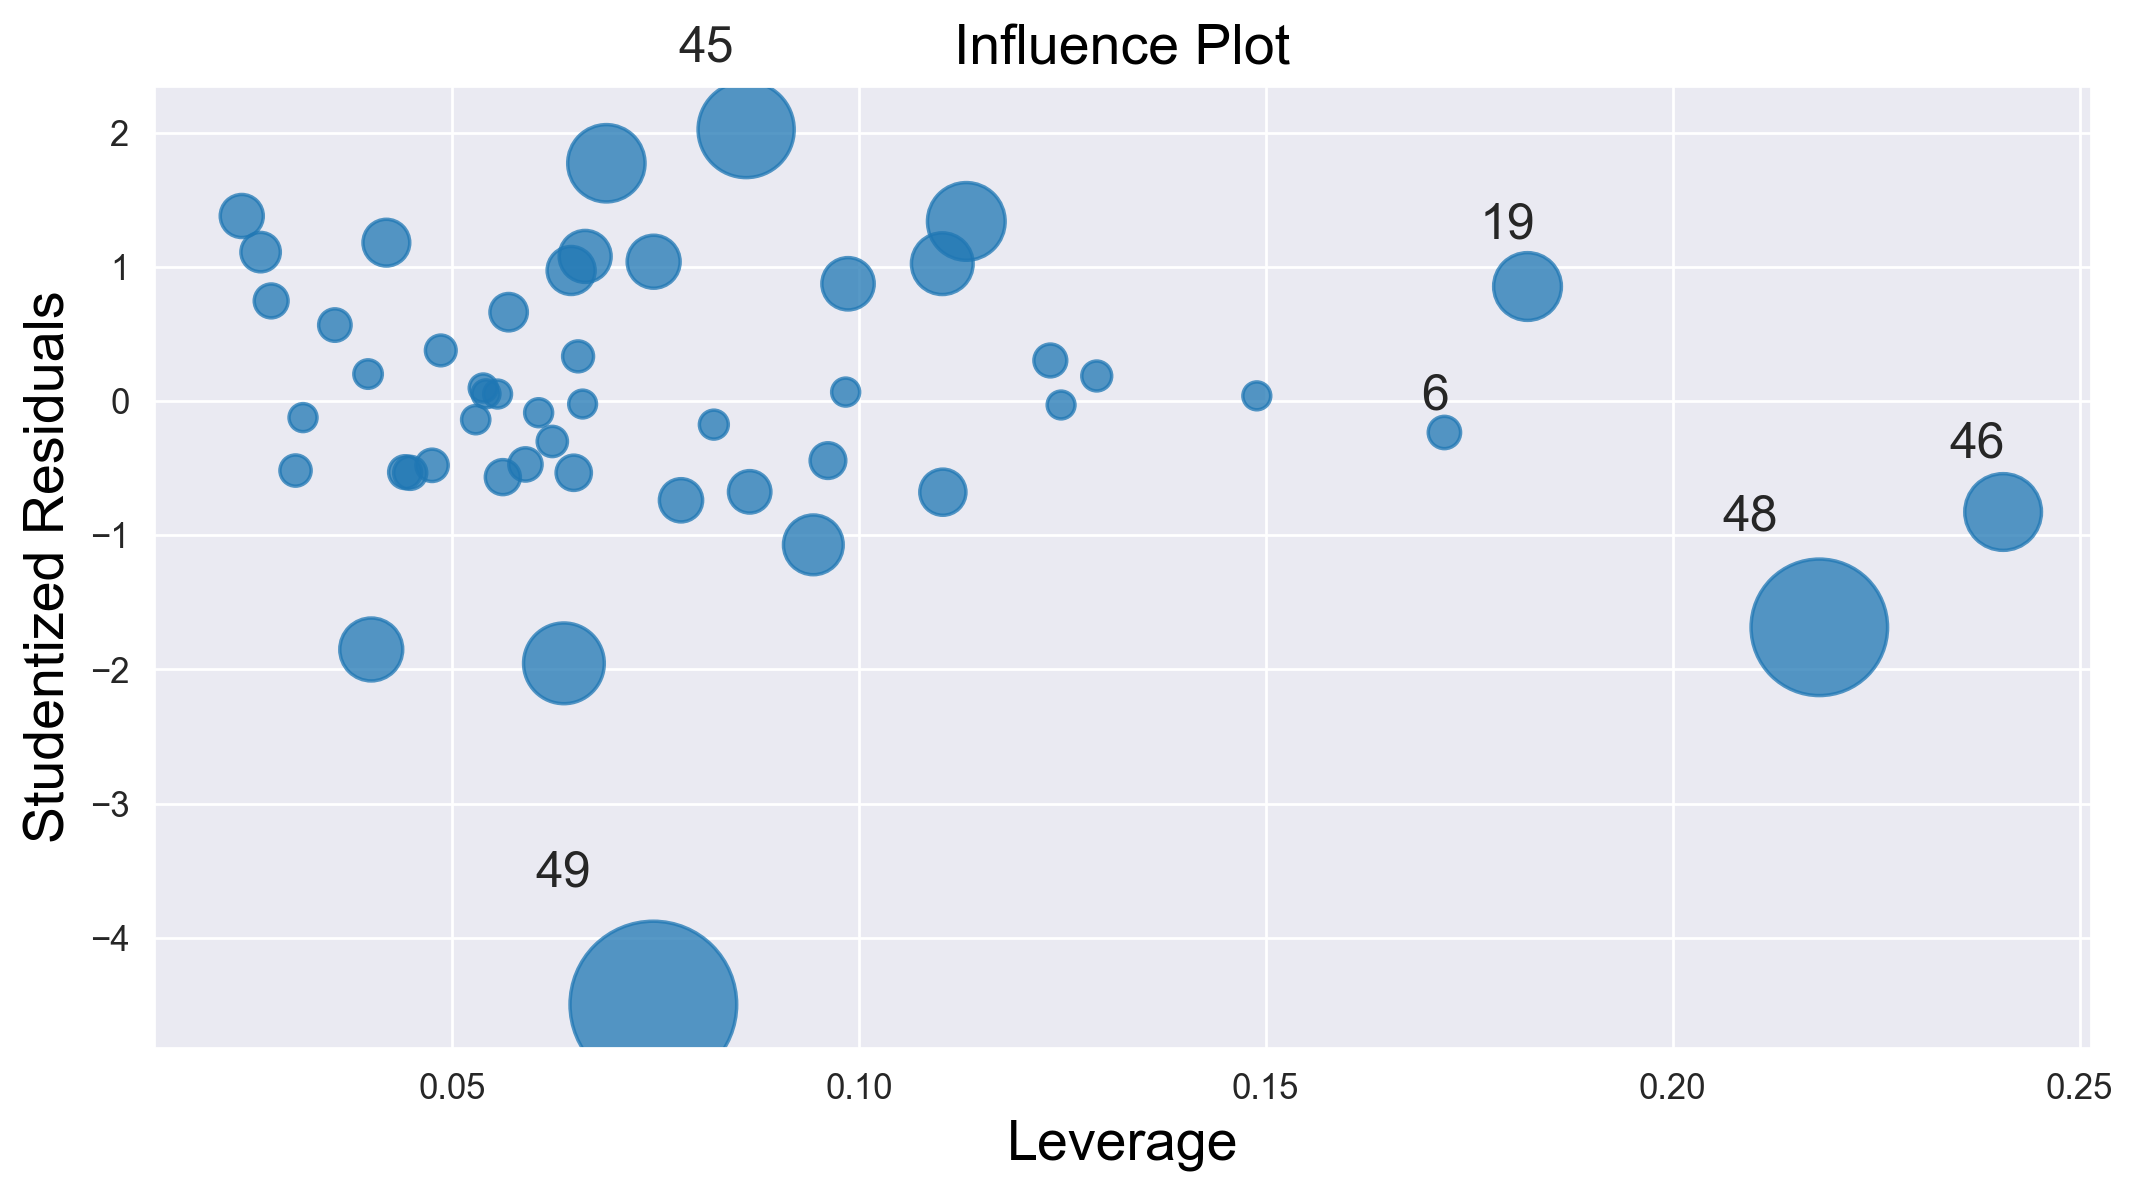

In [259]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()


In [260]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [261]:
#From the above plot, it is evident that there is no any  data point are the influencers
#Exclude variable "Administartion" and generate R-Squared and AIC values
final_ml_a= smf.ols('Profit~R_and_D_Spend+Marketing_Spend',data = df).fit()

In [262]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9504503015559763, 1057.070772191826)

In [264]:
#Exclude variable "MarketingSpend" and generate R-Squared and AIC values
final_ml_m= smf.ols('Profit~R_and_D_Spend+Administration',data = df).fit()

In [265]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.9478129385009173, 1059.6636934567293)

In [266]:
#Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [267]:
# Cook’s Distance

In [268]:
model_influence_a = final_ml_a.get_influence()
(c_a, _) = model_influence_a.cooks_distance

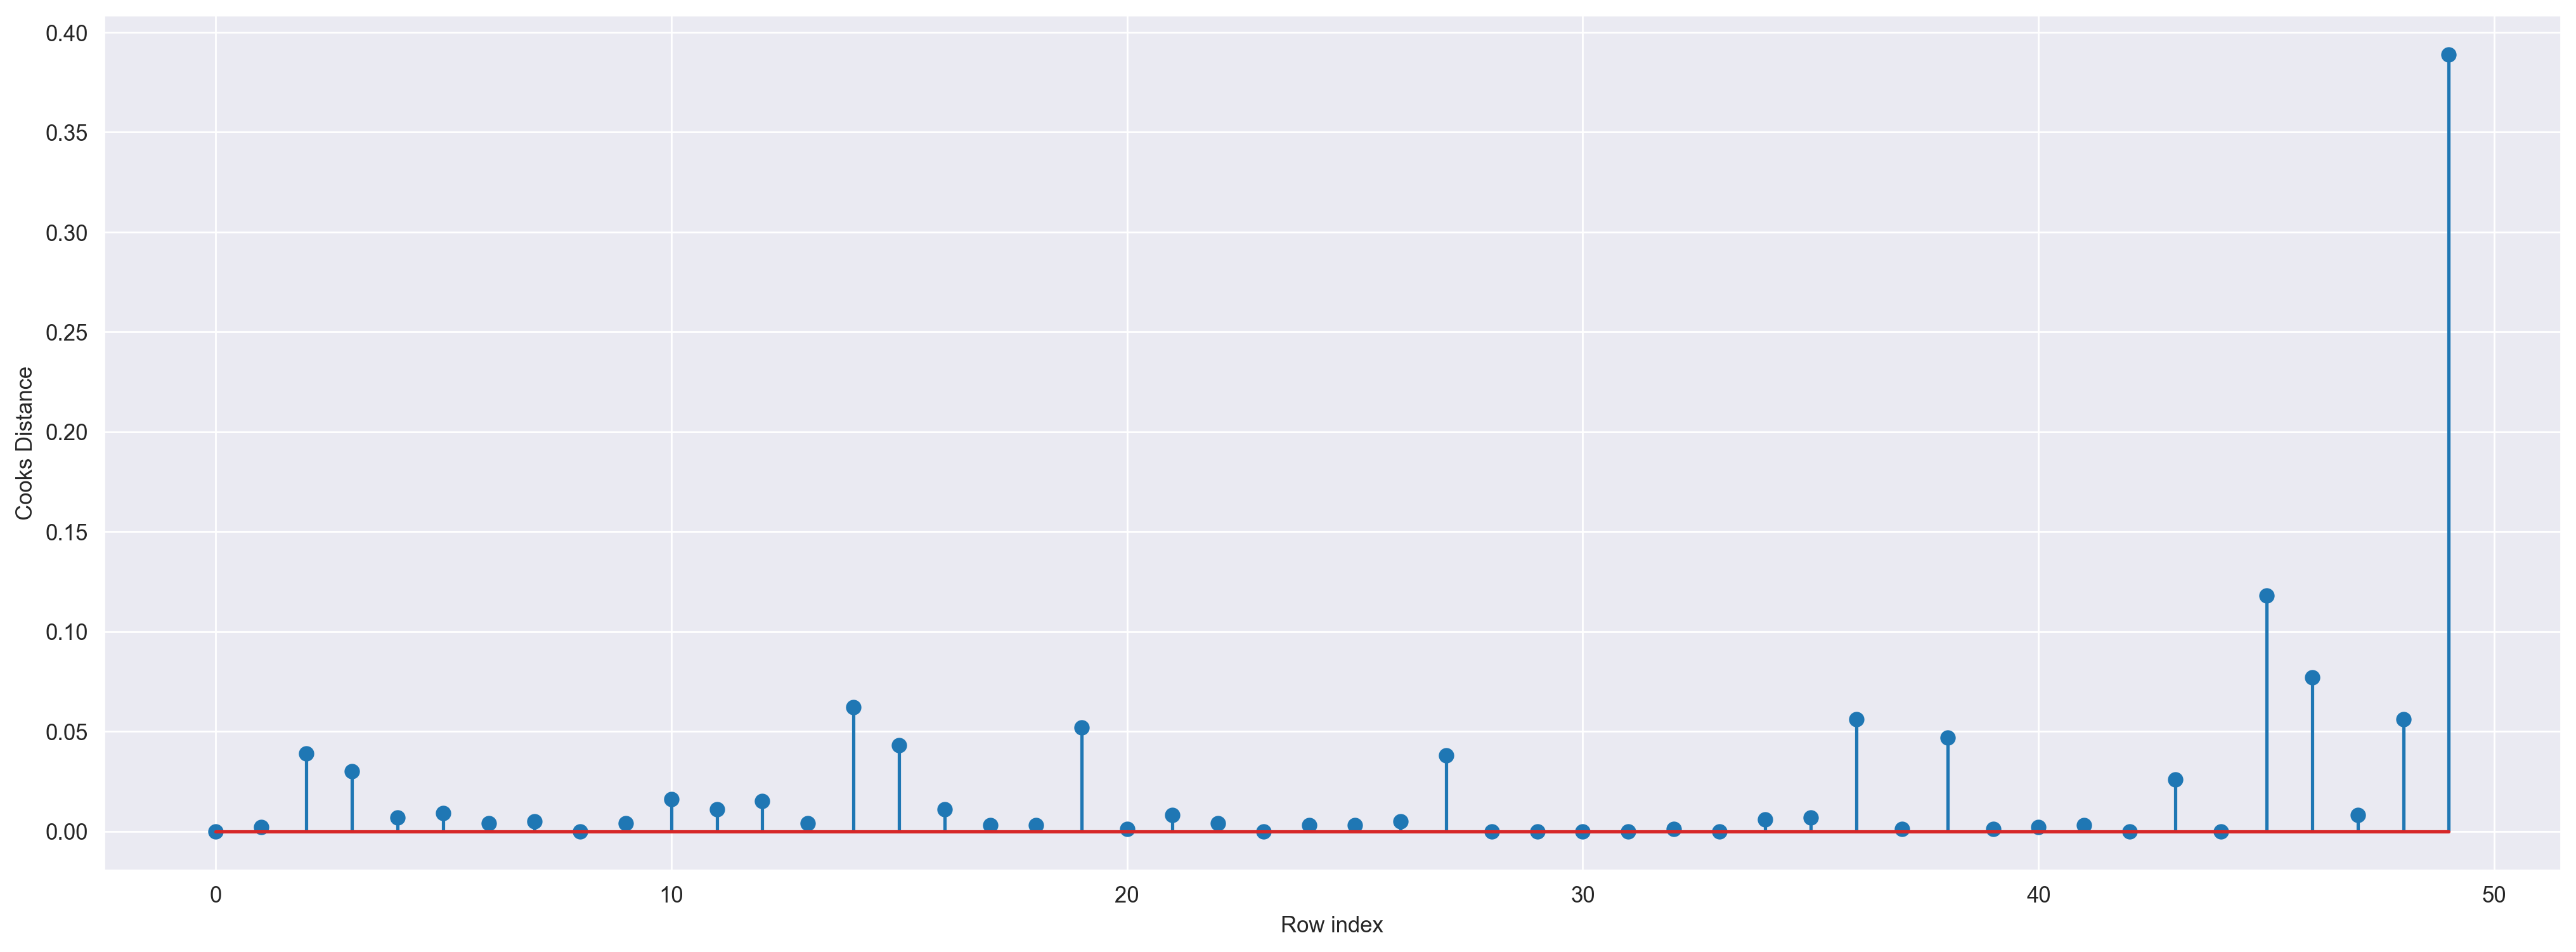

In [269]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c_a,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [270]:
#index of the data points where c is more than .5
(np.argmax(c_a),np.max(c_a))

(49, 0.38948862279249197)

In [271]:
#Since the value is <1 , we can stop the diagnostic process and finalize the mode
#Check the accuracy of the mode
final_ml_a= smf.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend',data = df).fit()
(final_ml_a.rsquared,final_ml_a.aic)

(0.9507459940683246, 1058.7714985998052)

In [272]:
#Predicting for new data
#New data for prediction
new_data=pd.DataFrame({"R_and_D_Spend":40,"Administration":95,"Marketing_Spend":102},index=[1])

In [273]:
final_ml_a.predict(new_data)

1    50154.651337
dtype: float64

In [274]:
final_ml_a.predict(df.iloc[0:2,])

0    192521.252890
1    189156.768232
dtype: float64

In [275]:
pred_y = final_ml_a.predict(df)

In [276]:
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [277]:
pd.options.display.max_rows = 50

In [278]:
pred_y 

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
